<a href="https://colab.research.google.com/github/willflan/auto_insurance_predictions/blob/main/auto_insurance_predictions_WillFlanagan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Auto Insurance Predictions

Will Flanagan

5 October 2022

# Summary of project

In this project, we analyze customer data for over 10,000 individuals with regards to auto insurance, aiming to predict whether or not a customer would generate a claim (i.e., be involved in an accident necessitating a payout) in a given year. The dataset from which we will build our predictive tools involves over 20 input variables, ranging from demographic to financial to historical — many customers have made claims in previous years. Some have made many claims.

Presumably, our goal is for the auto insurance company to turn a profit this year. Therefore, our strategy will err on the side of expecting more incidents than may actually occur, as while it may sound morbid, it is more fiscally prudent for the firm to account for slightly higher-than-expected risk than to do the opposite. In terms of data-science practicality, this means that false negatives are more threatening than false positives.

Roughly 80% of the data entries are tagged with two output variables: a binary flag that indicates whether or not the entry is associated with a claim and, for those that are indeed associated, a payout value in dollars. While building predictive capacity on the claim amounts is beyond the scope of this project, we will explore the data in great depth to predict the binary outcomes from multiple intellectual vantage points. Much of the content found in sections 3, 4, and 6 can be considered supplementary.

### Walkthrough
1. Acquire and inspect dataframes.
2. Clean data and create working variables.
3. Explore scatterplots of payouts vs. all input variables.
4. Quantify the qualitative and binary variables.
5. Analyze correlations between variables.
6. Experiment with a manual predictive approach.
7. Select key evaluative metric for binary classification.
8. Generate final results with a machine-learning model.

Let's hit the road!

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
url_train = 'https://raw.githubusercontent.com/descartes-underwriting/data-scientist-auto-test/main/data/auto-insurance-fall-2017/train_auto.csv'
df_train = pd.read_csv(url_train, index_col=0)
df_train

,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
INDEX,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0.0,0,60.0,0,11.0,"$67,349",No,$0,z_No,M,PhD,Professional,14,Private,"$14,230",11,Minivan,yes,"$4,461",2,No,3,18.0,Highly Urban/ Urban
2,0,0.0,0,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,z_High School,z_Blue Collar,22,Commercial,"$14,940",1,Minivan,yes,$0,0,No,0,1.0,Highly Urban/ Urban
4,0,0.0,0,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,z_High School,Clerical,5,Private,"$4,010",4,z_SUV,no,"$38,690",2,No,3,10.0,Highly Urban/ Urban
5,0,0.0,0,51.0,0,14.0,NaN,No,"$306,251",Yes,M,<High School,z_Blue Collar,32,Private,"$15,440",7,Minivan,yes,$0,0,No,0,6.0,Highly Urban/ Urban
6,0,0.0,0,50.0,0,NaN,"$114,986",No,"$243,925",Yes,z_F,PhD,Doctor,36,Private,"$18,000",1,z_SUV,no,"$19,217",2,Yes,3,17.0,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,0,0.0,0,35.0,0,11.0,"$43,112",No,$0,z_No,M,z_High School,z_Blue Collar,51,Commercial,"$27,330",10,Panel Truck,yes,$0,0,No,0,8.0,z_Highly Rural/ Rural
10298,0,0.0,1,45.0,2,9.0,"$164,669",No,"$386,273",Yes,M,PhD,Manager,21,Private,"$13,270",15,Minivan,no,$0,0,No,2,17.0,Highly Urban/ Urban
10299,0,0.0,0,46.0,0,9.0,"$107,204",No,"$332,591",Yes,M,Masters,NaN,36,Commercial,"$24,490",6,Panel Truck,no,$0,0,No,0,1.0,Highly Urban/ Urban


In [3]:
url_test = 'https://raw.githubusercontent.com/descartes-underwriting/data-scientist-auto-test/main/data/auto-insurance-fall-2017/test_auto.csv'
df_test = pd.read_csv(url_test, index_col=0)
df_test

,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
INDEX,,,,,,,,,,,,,,,,,,,,,,,,,
3,NaN,NaN,0,48.0,0,11.0,"$52,881",No,$0,z_No,M,Bachelors,Manager,26,Private,"$21,970",1,Van,yes,$0,0,No,2,10.0,Highly Urban/ Urban
9,NaN,NaN,1,40.0,1,11.0,"$50,815",Yes,$0,z_No,M,z_High School,Manager,21,Private,"$18,930",6,Minivan,no,"$3,295",1,No,2,1.0,Highly Urban/ Urban
10,NaN,NaN,0,44.0,2,12.0,"$43,486",Yes,$0,z_No,z_F,z_High School,z_Blue Collar,30,Commercial,"$5,900",10,z_SUV,no,$0,0,No,0,10.0,z_Highly Rural/ Rural
18,NaN,NaN,0,35.0,2,NaN,"$21,204",Yes,$0,z_No,M,z_High School,Clerical,74,Private,"$9,230",6,Pickup,no,$0,0,Yes,0,4.0,z_Highly Rural/ Rural
21,NaN,NaN,0,59.0,0,12.0,"$87,460",No,$0,z_No,M,z_High School,Manager,45,Private,"$15,420",1,Minivan,yes,"$44,857",2,No,4,1.0,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10279,NaN,NaN,0,46.0,0,0.0,$0,No,$0,Yes,z_F,z_High School,Student,32,Commercial,"$1,500",6,Sports Car,no,"$20,519",1,Yes,3,8.0,z_Highly Rural/ Rural
10281,NaN,NaN,0,46.0,0,12.0,"$43,501",No,"$134,977",Yes,M,z_High School,Professional,60,Private,"$16,080",3,Minivan,no,$0,0,No,2,1.0,z_Highly Rural/ Rural
10285,NaN,NaN,0,55.0,0,10.0,"$141,083",No,"$393,624",Yes,z_F,Masters,Lawyer,42,Private,"$21,110",10,Sports Car,no,$0,0,No,0,22.0,z_Highly Rural/ Rural


In [4]:
df_train.keys()

Index(['TARGET_FLAG', 'TARGET_AMT', 'KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ',
       'INCOME', 'PARENT1', 'HOME_VAL', 'MSTATUS', 'SEX', 'EDUCATION', 'JOB',
       'TRAVTIME', 'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR',
       'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CAR_AGE', 'URBANICITY'],
      dtype='object')

#### The first task is to break down the meaning of each of the 26 variables:

* INDEX: The identifier for each of the \~10,000 entries on insurance policy holders, segmented into training (\~80%) and test (\~20%)
* TARGET_FLAG: Was the entry associated with a claim/car crash?
* TARGET_AMT: If yes, what was the monetary value of the claim?
* KIDSDRIV: Number of driving children in the policy holder's household
* AGE: Age of policy holder
* HOMEKIDS: Number of children in the policy holder's household
* YOJ: Number of years the policy holder has held job
* INCOME: Income of policy holder
* PARENT1: Is policy holder a single parent?
* HOME_VAL: Home value of policy holder
* MSTATUS: Is the policy holder married?
* SEX: Sex of primary policy holder
* EDUCATION: Highest level of educational attainment of policy holder
* JOB: Employment category of policy holder
* TRAVTIME: Average number of minutes policy holder drives daily
* CAR_USE: Is the policy associated with private or commercial driving?
* BLUEBOOK: Monetary value of policy holder's vehicle
* TIF: Number of years policy holder has held policy
* CAR_TYPE: Category of vehicle policy holder drives
* RED_CAR: Is the car red?
* OLDCLAIM: Monetary value of previous claim(s) associated with policy holder
* CLM_FREQ: How many claims have been made by policy holder?
* REVOKED: Has the policy holder previously lost driving priviliges?
* MVR_PTS: Number of points on policy holder's driving licence
* CAR_AGE: Age of policy holder's vehicle
* URBANICITY: Is the policy holder primarily based in a (highly) rural or (highly) urban area?

# 2. Clean data and create working variables.

#### First cleaning step:

We will get rid of commas, dollar signs, and 'z_' prefixes. 

For the 'yes-no' binary variables, we will set the permutations of 'yes' to 1 and 'no' to 0.

In [5]:
df_train = df_train.replace({'\$':''}, regex = True).replace({'\,':''}, regex = True).replace({'z_':''}, regex = True)
df_train = df_train.replace({'no': 0, 'yes': 1}).replace({'No': 0, 'Yes': 1}).replace({'z_No': 0, 'Yes': 1})

df_train;

We will repeat this for the test data:

In [6]:
df_test = df_test.replace({'no': 0, 'yes': 1}).replace({'No': 0, 'Yes': 1}).replace({'z_No': 0, 'Yes': 1})
df_test = df_test.replace({'\$':''}, regex = True).replace({'\,':''}, regex = True).replace({'z_':''}, regex = True)

df_test;

#### Our next step will be the most radical one we take — excluding all rows with 'NaN':

We will obviously NOT assume that all instances of 'NaN' are equivalent in meaning to 0.

We will, however, exclude null rows with the purpose of conducting our training on the complete entries.

This is not a cleaning step _per se_, but it will similarly help us formulate understandings and our prediction algorithm. 

'df_train' will remain our raw training dataset; we will selectively duplicate it into 'df_tr2' for cleaning, variable modification, and (eventual) training.

In [7]:
df_train.isna().sum()

TARGET_FLAG      0
TARGET_AMT       0
KIDSDRIV         0
AGE              6
HOMEKIDS         0
YOJ            454
INCOME         445
PARENT1          0
HOME_VAL       464
MSTATUS          0
SEX              0
EDUCATION        0
JOB            526
TRAVTIME         0
CAR_USE          0
BLUEBOOK         0
TIF              0
CAR_TYPE         0
RED_CAR          0
OLDCLAIM         0
CLM_FREQ         0
REVOKED          0
MVR_PTS          0
CAR_AGE        510
URBANICITY       0
dtype: int64

In [8]:
df_test.isna().sum()

TARGET_FLAG    2141
TARGET_AMT     2141
KIDSDRIV          0
AGE               1
HOMEKIDS          0
YOJ              94
INCOME          125
PARENT1           0
HOME_VAL        111
MSTATUS           0
SEX               0
EDUCATION         0
JOB             139
TRAVTIME          0
CAR_USE           0
BLUEBOOK          0
TIF               0
CAR_TYPE          0
RED_CAR           0
OLDCLAIM          0
CLM_FREQ          0
REVOKED           0
MVR_PTS           0
CAR_AGE         129
URBANICITY        0
dtype: int64

We see that the variables that contain NaN values are consistent for both train and test data:
* AGE (just a few)
* YOJ
* INCOME
* HOME_VAL
* JOB
* CAR_AGE

In [9]:
df_tr2 = df_train.dropna()

print(len(df_tr2))
print(np.round((len(df_tr2) / len(df_train)), 4))

6045
0.7407


In [10]:
df_tr2

,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
INDEX,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0.0,0,60.0,0,11.0,67349,0,0,0,M,PhD,Professional,14,Private,14230,11,Minivan,1,4461,2,0,3,18.0,Highly Urban/ Urban
2,0,0.0,0,43.0,0,11.0,91449,0,257252,0,M,High School,Blue Collar,22,Commercial,14940,1,Minivan,1,0,0,0,0,1.0,Highly Urban/ Urban
4,0,0.0,0,35.0,1,10.0,16039,0,124191,1,F,High School,Clerical,5,Private,4010,4,SUV,0,38690,2,0,3,10.0,Highly Urban/ Urban
7,1,2946.0,0,34.0,1,12.0,125301,1,0,0,F,Bachelors,Blue Collar,46,Commercial,17430,1,Sports Car,0,0,0,0,0,7.0,Highly Urban/ Urban
12,1,2501.0,0,34.0,0,10.0,62978,0,0,0,F,Bachelors,Clerical,34,Private,11200,1,SUV,0,0,0,0,0,1.0,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10296,0,0.0,0,41.0,0,7.0,6256,0,0,0,M,High School,Student,41,Private,5600,1,Pickup,0,0,0,0,0,7.0,Highly Rural/ Rural
10297,0,0.0,0,35.0,0,11.0,43112,0,0,0,M,High School,Blue Collar,51,Commercial,27330,10,Panel Truck,1,0,0,0,0,8.0,Highly Rural/ Rural
10298,0,0.0,1,45.0,2,9.0,164669,0,386273,1,M,PhD,Manager,21,Private,13270,15,Minivan,0,0,0,0,2,17.0,Highly Urban/ Urban


We see that we have excluded ~26% of the original data.

#### Working variables:

The next task is to create working variables for plots and correlations.
For the training data, they will simply be the CSV keys, but in lowercase.

For simplicity through uniformity, we will ultimately want everything in float type. We will work on quantification of qualitative/binary variables later, but anything that can reasonably be a float now, we will convert into one.

In [11]:
# index = df_train['INDEX']
target_flag = df_tr2['TARGET_FLAG'].astype(float)
target_amt = df_tr2['TARGET_AMT'].astype(float)
kidsdriv = df_tr2['KIDSDRIV'].astype(float)
age = df_tr2['AGE'].astype(float)
homekids = df_tr2['HOMEKIDS'].astype(float)
yoj = df_tr2['YOJ'].astype(float)
income = df_tr2['INCOME'].astype(float)
parent1 = df_tr2['PARENT1'].astype(float)
home_val = df_tr2['HOME_VAL'].astype(float)
mstatus = df_tr2['MSTATUS'].astype(float)
sex = df_tr2['SEX']
education = df_tr2['EDUCATION']
job = df_tr2['JOB']
travtime = df_tr2['TRAVTIME'].astype(float)
car_use = df_tr2['CAR_USE']
bluebook = df_tr2['BLUEBOOK'].astype(float)
tif = df_tr2['TIF'].astype(float)
car_type = df_tr2['CAR_TYPE']
red_car = df_tr2['RED_CAR'].astype(float)
oldclaim = df_tr2['OLDCLAIM'].astype(float)
clm_freq = df_tr2['CLM_FREQ'].astype(float)
revoked = df_tr2['REVOKED'].astype(float)
mvr_pts = df_tr2['MVR_PTS'].astype(float)
car_age = df_tr2['CAR_AGE'].astype(float)
urbanicity = df_tr2['URBANICITY']

Repeating this for the test data, variables will also be the CSV keys, but in UPPERCASE.

In [12]:
df_test2 = df_test
# df_test2 = df_test.dropna(subset != ['INCOME', 'HOME_VAL', 'BLUEBOOK', 'OLDCLAIM'])

TARGET_FLAG = df_test2['TARGET_FLAG'].astype(float)
TARGET_AMT = df_test2['TARGET_AMT'].astype(float)
KIDSDRIV = df_test2['KIDSDRIV'].astype(float)
AGE = df_test2['AGE'].astype(float)
HOMEKIDS = df_test2['HOMEKIDS'].astype(float)
YOJ = df_test2['YOJ'].astype(float)
INCOME = df_test2['INCOME'].astype(float)
PARENT1 = df_test2['PARENT1'].astype(float)
HOME_VAL = df_test2['HOME_VAL'].astype(float)
MSTATUS = df_test2['MSTATUS'].astype(float)
SEX = df_test2['SEX']
EDUCATION = df_test2['EDUCATION']
JOB = df_test2['JOB']
TRAVTIME = df_test2['TRAVTIME'].astype(float)
CAR_USE = df_test2['CAR_USE']
BLUEBOOK = df_test2['BLUEBOOK'].astype(float)
TIF = df_test2['TIF'].astype(float)
CAR_TYPE = df_test2['CAR_TYPE']
RED_CAR = df_test2['RED_CAR'].astype(float)
OLDCLAIM = df_test2['OLDCLAIM'].astype(float)
CLM_FREQ = df_test2['CLM_FREQ'].astype(float)
REVOKED = df_test2['REVOKED'].astype(float)
MVR_PTS = df_test2['MVR_PTS'].astype(float)
CAR_AGE = df_test2['CAR_AGE'].astype(float)
URBANICITY = df_test2['URBANICITY']

For the test data, note that we have NOT removed instances of 'NaN' — which exist on every test entry due to the two undetermined 'TARGET' variables — as we will want to apply the prediction algorithm from our learning to every test entry.

We will not touch the test data for a while.

#### Coherence check: Scatterplots of the 'TARGET' variables

Our first graphical investigation of our training data is a coherence check dealing with the variables TARGET_FLAG and TARGET_AMT: All instances of a flag of 0 should correspond to payout amounts of 0, and all instances of a flag of 1 should correspond to nonzero payouts.

Frequency of nonzero payouts: 0.2650124069478908
Frequency of flagged events:  0.2650124069478908
Minimum (cleaned training) payout = $ 30.277280146
Maximum (cleaned training) payout = $ 85523.653347


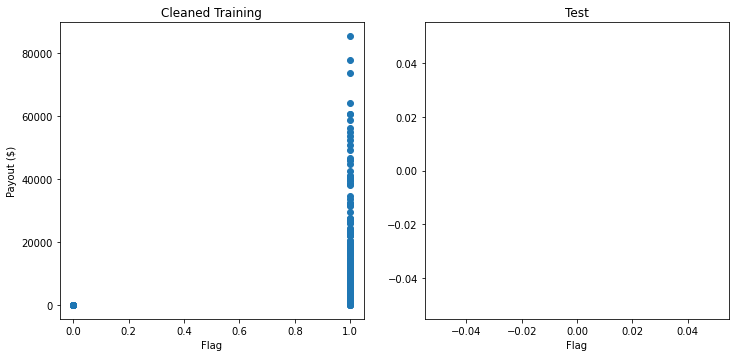

In [13]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

ax1.scatter(target_flag, target_amt);
ax1.set_ylabel('Payout ($)')
ax1.set_xlabel('Flag')
ax1.set_title('Cleaned Training')
ax2.scatter(TARGET_FLAG, TARGET_AMT);
ax2.set_xlabel('Flag')
ax2.set_title('Test')

print('Frequency of nonzero payouts:', len(target_amt[target_amt != 0]) / len(target_amt))
print('Frequency of flagged events: ', len(target_flag[target_flag == 1]) / len(target_flag))
print('Minimum (cleaned training) payout = $',np.min(target_amt[target_flag == 1]))
print('Maximum (cleaned training) payout = $',np.max(target_amt[target_flag == 1]))

The left subplot shows all the claims for our cleaned training data, and the right for our test data.
We see that in the cleaned training data, 26.5% of claims resulted in a payout, ranging from \\$30 to \\$85,524.
Furthermore, all of the flagging in the cleaned training data appears to be correct.

In the right subplot, we see that the test data is completely blank for the TARGET_FLAG and TARGET_AMT variables, as expected. (Filling out these variables is the ultimate goals of our discovery and result formulation.)

# 3. Explore scatterplots of payouts vs. all input variables.

In this section, we will analyze initial plots and diagnose anything that seems interesting or suspicious. It will be lengthy but worth investigating. I will make periodic comments, though this is merely the first graphical interaction with the data (and not the best visualization for all of the variables!), so some insights will come in later sections.

There are 23 variables (not counting 'index', 'target_flag', 'target_amt'). To save space, we will subplot three different variables in the each notebook section — but on different axes!

(These variables will mainly be plotted in original order, but we will save the three qualitative variables for last.)

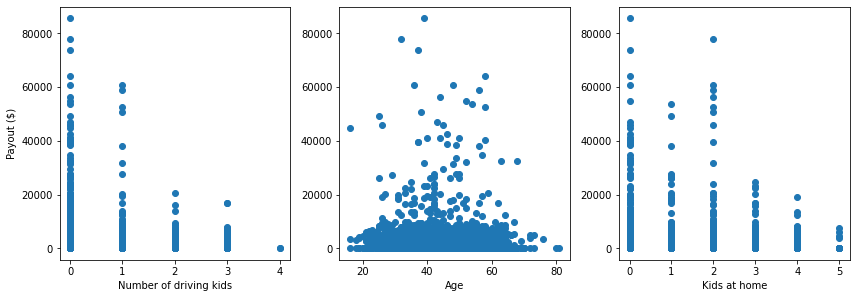

In [14]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(331)
ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)
ax1.scatter(kidsdriv, target_amt);
ax2.scatter(age, target_amt);
ax3.scatter(homekids, target_amt);
ax1.set_ylabel('Payout ($)')
ax1.set_xlabel('Number of driving kids')
ax2.set_xlabel('Age')
ax3.set_xlabel('Kids at home')
plt.tight_layout()

The leftmost plot is hardly surprising: As children have less driving experience than adults families with many driving children are more likely to see an incident in a given year. It appears to be correlated with the rightmost graph.

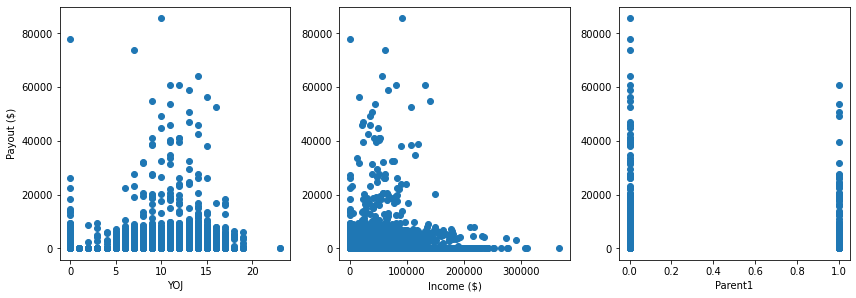

In [15]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(331)
ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)
ax1.scatter(yoj, target_amt);
ax2.scatter(income, target_amt);
ax3.scatter(parent1, target_amt);
ax1.set_ylabel('Payout ($)')
ax1.set_xlabel('YOJ')
ax2.set_xlabel('Income ($)')
ax3.set_xlabel('Parent1')
plt.tight_layout()

Again, the spike at 0 on leftmost graph may be associated with youth, or at least some other kind of 'newness', as the driver in question may have freshly moved to a new city/taken a new job/started a new insurance policy.

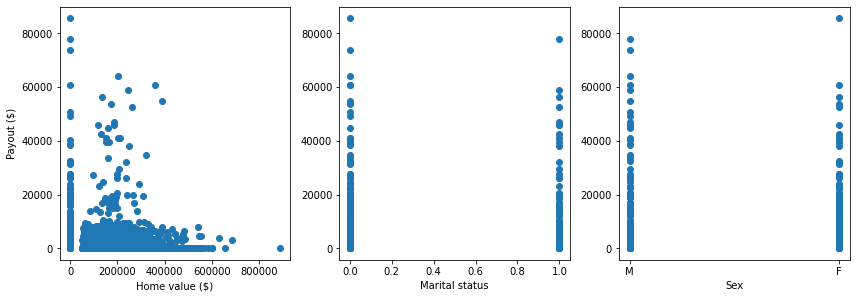

In [16]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(331)
ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)
ax1.scatter(home_val, target_amt);
ax2.scatter(mstatus, target_amt);
ax3.scatter(sex, target_amt);
ax1.set_ylabel('Payout ($)')
ax1.set_xlabel('Home value ($)')
ax2.set_xlabel('Marital status')
ax3.set_xlabel('Sex')
plt.tight_layout()

#### Homes aren't worth nothing! But the above scatterplot says that many are...?

In [17]:
len(home_val[home_val == 0])

1816

The case of 'home_val == 0' constitutes a substantial portion of our cleaned training data — roughly 30%. 

When using 'home_val' variable in further analysis, we will assume that 0 indicates renting.

According to a Pew Research study from 2021, 36% of Americans rent. It is a sound assumption that a group with car access (albeit in a combination of private and commercial) would skew toward slightly higher home ownership, as many renters are presumably in cities with a broader variety of transit options.

https://www.pewresearch.org/fact-tank/2021/08/02/as-national-eviction-ban-expires-a-look-at-who-rents-and-who-owns-in-the-u-s/

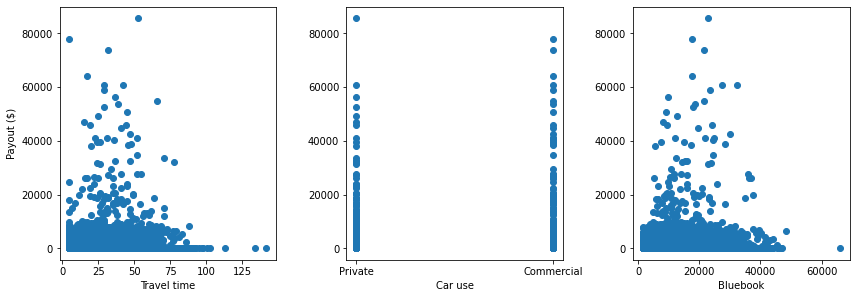

In [18]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(331)
ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)
ax1.scatter(travtime, target_amt);
ax2.scatter(car_use, target_amt);
ax3.scatter(bluebook, target_amt);
ax1.set_ylabel('Payout ($)')
ax1.set_xlabel('Travel time')
ax2.set_xlabel('Car use')
ax3.set_xlabel('Bluebook')
plt.tight_layout()

It looks like mid-range commutes may be the most dangerous. It makes sense that very long commutes appear safer, as they likely involve extensive use of the Interstate system, where per-kilometer crash rate is exceptionally low.

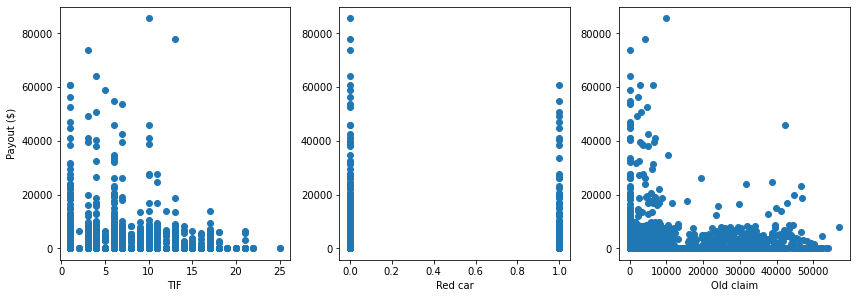

In [19]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(331)
ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)
ax1.scatter(tif, target_amt);
ax2.scatter(red_car, target_amt);
ax3.scatter(oldclaim, target_amt);
ax1.set_ylabel('Payout ($)')
ax1.set_xlabel('TIF')
ax2.set_xlabel('Red car')
ax3.set_xlabel('Old claim')
plt.tight_layout()

The 'TIF' scatterplot is somewhat reminiscent of the 'YOJ' scatterplot: Many new policies are characterized by rapid and costly payouts.

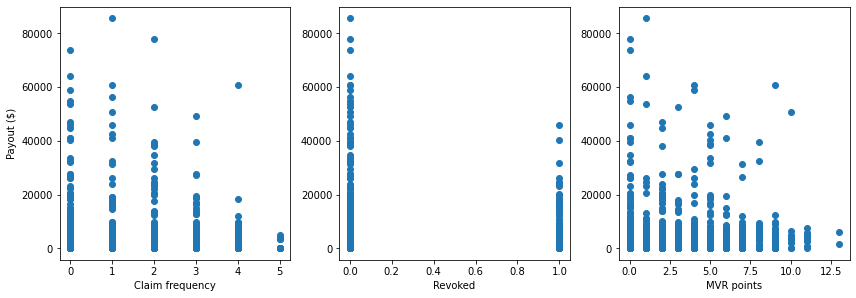

In [20]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(331)
ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)
ax1.scatter(clm_freq, target_amt);
ax2.scatter(revoked, target_amt);
ax3.scatter(mvr_pts, target_amt);
ax1.set_ylabel('Payout ($)')
ax1.set_xlabel('Claim frequency')
ax2.set_xlabel('Revoked')
ax3.set_xlabel('MVR points')
plt.tight_layout()

With both the 'clm_freq' and 'mvr_pts' scatterplots, we see that drivers with the most _interesting_ histories either learn to be extremely cautious, quit or are dropped from their policies, or simply don't quality for large payouts when incidents do happen...

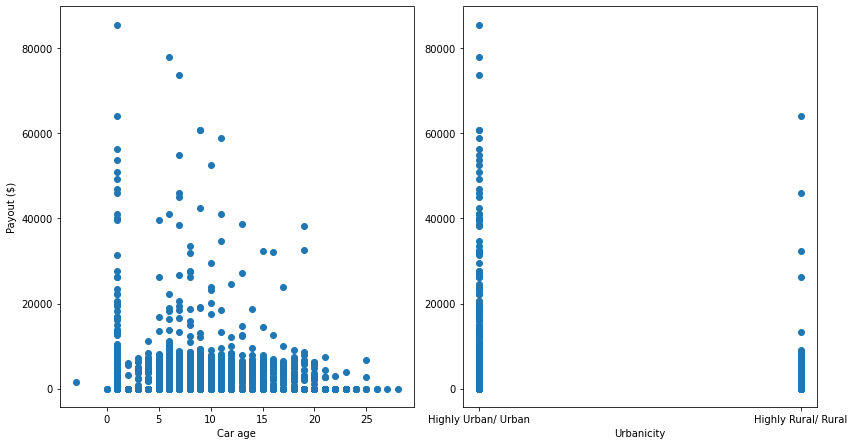

In [21]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax1.scatter(car_age, target_amt);
ax2.scatter(urbanicity, target_amt);
ax1.set_ylabel('Payout ($)')
ax1.set_xlabel('Car age')
ax2.set_xlabel('Urbanicity')
plt.tight_layout()

We see quite a lot of crashes involving new cars! How unfortunate. It makes sense that the payouts would be exceptionally large, as depreciation has not even had time to take effect.

#### Now onto the three qualitative variables: 'education', 'job', and 'car_type'.

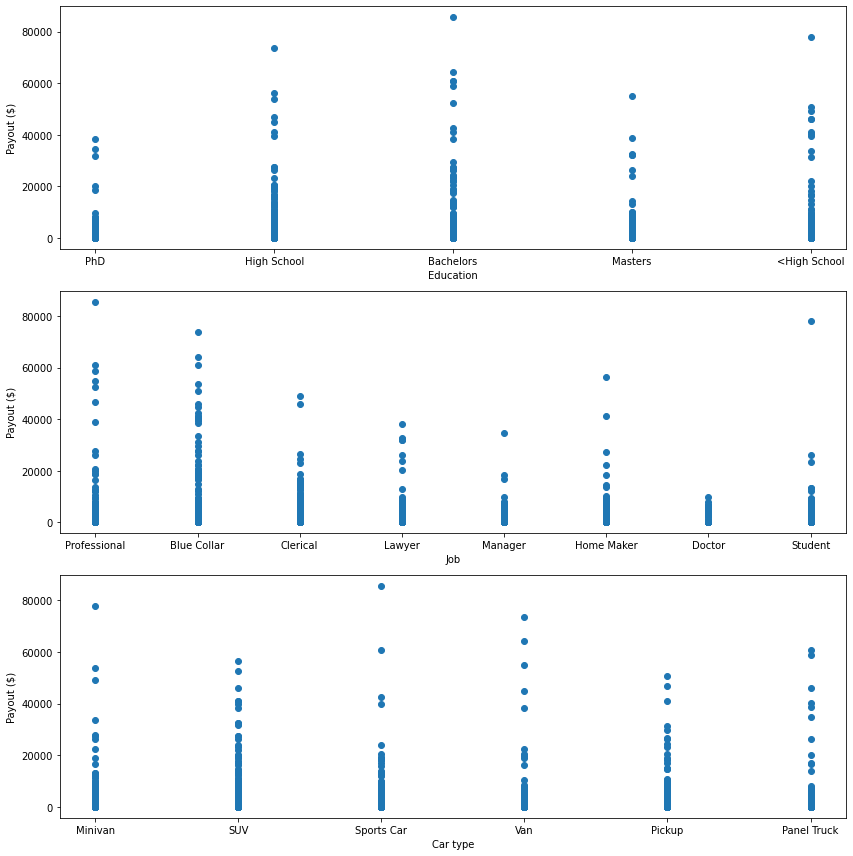

In [22]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
ax1.scatter(education, target_amt);
ax2.scatter(job, target_amt);
ax3.scatter(car_type, target_amt);
ax1.set_ylabel('Payout ($)')
ax2.set_ylabel('Payout ($)')
ax3.set_ylabel('Payout ($)')
ax1.set_xlabel('Education')
ax2.set_xlabel('Job')
ax3.set_xlabel('Car type')
plt.tight_layout()

# 4. Quantify the qualitative and binary variables.

### Education

Perhaps unsurprisingly, this will prove to be the most straightforward qualitative variable to quantify.

In [23]:
print('Mean payouts by education:')
print('<High School: $', np.mean(target_amt[education == '<High School']))
print('High School:  $', np.mean(target_amt[education == 'High School']))
print('Bachelors:    $', np.mean(target_amt[education == 'Bachelors']))
print('Masters:      $', np.mean(target_amt[education == 'Masters']))
print('PhD:          $', np.mean(target_amt[education == 'PhD']))

Mean payouts by education:
<High School: $ 1906.4018633488274
High School:  $ 1772.123729165468
Bachelors:    $ 1381.4208485326665
Masters:      $ 913.9466465364468
PhD:          $ 1038.7578920718465


With increases in education, there may be two competing factors that wouuld be relevant for insurance: car "fanciness" and driver caution.

While we see a slightly negative trend in payout vs. education above, below we see that increased education appears to correlate with a decrease in incident frequency. This indicates that driver caution might outweigh car "fanciness".

In [24]:
print('80th-percentile payouts by education:')
print('<High School: $', np.percentile(target_amt[education == '<High School'], 80))
print('High School:  $', np.percentile(target_amt[education == 'High School'], 80))
print('Bachelors:    $', np.percentile(target_amt[education == 'Bachelors'], 80))
print('Masters:      $', np.percentile(target_amt[education == 'Masters'], 80))
print('PhD:          $', np.percentile(target_amt[education == 'PhD'], 80))

80th-percentile payouts by education:
<High School: $ 3554.4
High School:  $ 3520.4000000000005
Bachelors:    $ 1430.6000000000006
Masters:      $ 0.0
PhD:          $ 0.0


Fewer than 20% of the post-Bachelor-educated in our dataset required a payout, and the 80th-percentile payout decreased as education bracket increased.

Next, we can look at the profiles of ALL payout percentiles for each education level.

In general, the scatterplots we made above were not extremely helpful for the binary or qualitative variables. This percentile-analysis approach will be more illumiating, and it will help us provide some rigor for the quantification process.

#### Basic code for getting payout percentiles:

In [25]:
percentiles = []
for i in range (0, 100, 1):
    percentiles.append(i)

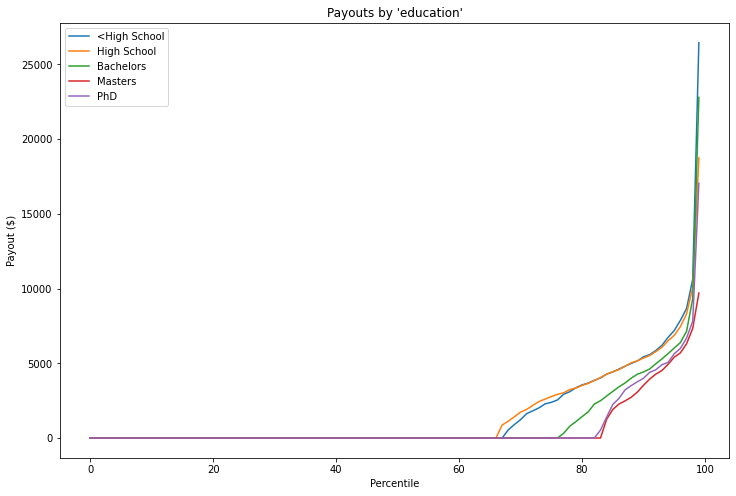

In [26]:
less_HS_pct = [np.percentile(target_amt[education == '<High School'], i) for i in percentiles]
HS_pct = [np.percentile(target_amt[education == 'High School'], i) for i in percentiles]
bachelors_pct = [np.percentile(target_amt[education == 'Bachelors'], i) for i in percentiles]
masters_pct = [np.percentile(target_amt[education == 'Masters'], i) for i in percentiles]
PhD_pct = [np.percentile(target_amt[education == 'PhD'], i) for i in percentiles]

fig = plt.figure(figsize=(12, 8))
plt.plot(percentiles, less_HS_pct, label = '<High School');
plt.plot(percentiles, HS_pct, label = 'High School');
plt.plot(percentiles, bachelors_pct, label = 'Bachelors');
plt.plot(percentiles, masters_pct, label = 'Masters');
plt.plot(percentiles, PhD_pct, label = 'PhD');
plt.title('Payouts by \'education\'');
plt.xlabel('Percentile');
plt.ylabel('Payout ($)');
plt.legend();

#### We can construct a new variable called 'eduquant', mapping each category to a value as follows:

* '<High School': 1
* 'High School': 2
* 'Bachelors': 3
* 'Masters': 4
* 'PhD': 5

In [27]:
eduquant_map = {'<High School': 1, 'High School': 2, 'Bachelors': 3, 'Masters': 4, 'PhD': 5}
df_train['EDUQUANT'] = df_train['EDUCATION'].map(eduquant_map);
df_train;

In [28]:
df_train.keys()

Index(['TARGET_FLAG', 'TARGET_AMT', 'KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ',
       'INCOME', 'PARENT1', 'HOME_VAL', 'MSTATUS', 'SEX', 'EDUCATION', 'JOB',
       'TRAVTIME', 'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR',
       'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CAR_AGE', 'URBANICITY',
       'EDUQUANT'],
      dtype='object')

In [29]:
df_train['EDUQUANT']

INDEX
1        5
2        2
4        2
5        1
6        5
        ..
10297    2
10298    5
10299    4
10301    3
10302    2
Name: EDUQUANT, Length: 8161, dtype: int64

In [30]:
eduquant = education.map(eduquant_map);
eduquant

INDEX
1        5
2        2
4        2
7        3
12       3
        ..
10296    2
10297    2
10298    5
10301    3
10302    2
Name: EDUCATION, Length: 6045, dtype: int64

### Job

Visually, education appeared to be a more meaningful variable than these (as well as easier to quantify in an objective manner).

Given that this is a short project, we will not ultimately try to quantify these. Nonetheless, we can see which categories of job and car type tend to lead to the largest payouts.

Mean payouts by profession:
Professional: $ 1512.8720686812214
Blue Collar:  $ 2117.002581277958
Clerical:     $ 1511.4008134266148
Lawyer:       $ 1069.3717139477164
Manager:      $ 595.1003907579975
Home Maker:   $ 1424.905358704752
Doctor:       $ 595.1678278395
Student:      $ 1787.1286662216016


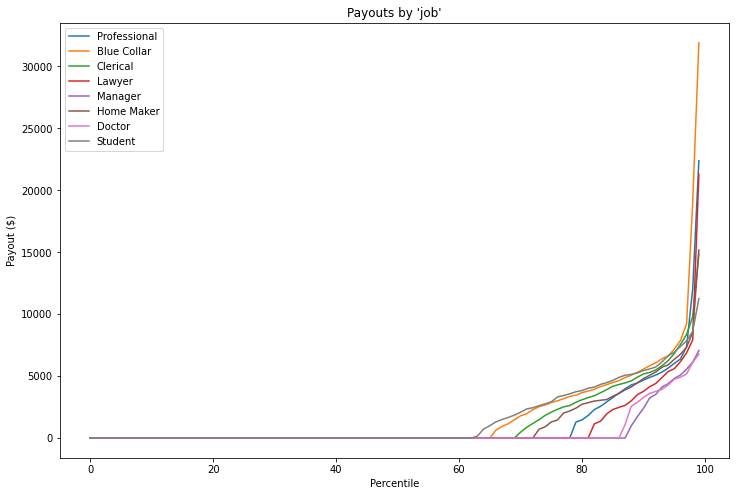

In [31]:
print('Mean payouts by profession:')
print('Professional: $', np.mean(target_amt[job == 'Professional']))
print('Blue Collar:  $', np.mean(target_amt[job == 'Blue Collar']))
print('Clerical:     $', np.mean(target_amt[job == 'Clerical']))
print('Lawyer:       $', np.mean(target_amt[job == 'Lawyer']))
print('Manager:      $', np.mean(target_amt[job == 'Manager']))
print('Home Maker:   $', np.mean(target_amt[job == 'Home Maker']))
print('Doctor:       $', np.mean(target_amt[job == 'Doctor']))
print('Student:      $', np.mean(target_amt[job == 'Student']))

professional_pct = [np.percentile(target_amt[job == 'Professional'], i) for i in percentiles]
blue_collar_pct = [np.percentile(target_amt[job == 'Blue Collar'], i) for i in percentiles]
clerical_pct = [np.percentile(target_amt[job == 'Clerical'], i) for i in percentiles]
lawyer_pct = [np.percentile(target_amt[job == 'Lawyer'], i) for i in percentiles]
manager_pct = [np.percentile(target_amt[job == 'Manager'], i) for i in percentiles]
home_maker_pct = [np.percentile(target_amt[job == 'Home Maker'], i) for i in percentiles]
doctor_pct = [np.percentile(target_amt[job == 'Doctor'], i) for i in percentiles]
student_pct = [np.percentile(target_amt[job == 'Student'], i) for i in percentiles]

fig = plt.figure(figsize=(12, 8))
plt.plot(percentiles, professional_pct, label = 'Professional');
plt.plot(percentiles, blue_collar_pct, label = 'Blue Collar');
plt.plot(percentiles, clerical_pct, label = 'Clerical');
plt.plot(percentiles, lawyer_pct, label = 'Lawyer');
plt.plot(percentiles, manager_pct, label = 'Manager');
plt.plot(percentiles, home_maker_pct, label = 'Home Maker');
plt.plot(percentiles, doctor_pct, label = 'Doctor');
plt.plot(percentiles, student_pct, label = 'Student');
plt.title('Payouts by \'job\'');
plt.xlabel('Percentile');
plt.ylabel('Payout ($)');
plt.legend();

Blue-collar workers appear to be the leader on payouts, as their accidents are both frequent (second only to students) and expensive. This could partly be because their jobs involve large or expensive vehicles that other people would not drive (many other job types probably do not even directly involve driving).

One could construct a binary "blue-collar or not?" variable that may have some predictive power, given that the mean payout is nearly \$850 more for blue-collar workers.

In [32]:
print('Mean payouts by blue-collar status:')
print('Blue Collar:     $', np.mean(target_amt[job == 'Blue Collar']))
print('NOT Blue Collar: $', np.mean(target_amt[job != 'Blue Collar']))

Mean payouts by blue-collar status:
Blue Collar:     $ 2117.002581277958
NOT Blue Collar: $ 1273.772225858085


Looking into the job data from the opposite direction, Managers and Doctors had particularly low mean payouts:

In [33]:
print('Mean payouts by doctor/manager status:')
print('Doctor/Manager:     $', np.mean(target_amt[job == ('Doctor' or 'Manager')]))
print('NOT Doctor/Manager: $', np.mean(target_amt[job != ('Doctor' or 'Manager')]))

Mean payouts by doctor/manager status:
Doctor/Manager:     $ 595.1678278395
NOT Doctor/Manager: $ 1509.927723583226


#### Much like 'eduquant', we can construct a new variable called 'jobquant':

* 'Blue Collar' / 'Student': 1
* All other jobs: 2
* 'Doctor' / 'Manager': 3

In [34]:
jobquant_map = {'Blue Collar': 1, 'Student': 1, 'Professional': 2, 'Clerical': 2, 'Lawyer': 2, 'Home Maker': 2, 'Doctor': 3, 'Manager': 3}
df_train['JOBQUANT'] = df_train['JOB'].map(jobquant_map);
df_train;

In [35]:
jobquant = job.map(jobquant_map)
jobquant;

### Car Type

Similarly looking at the mean payouts by car type:

Mean payouts by car type:
Minivan:      $ 850.5629827373191
SUV:          $ 1586.2846100536608
Sports Car:   $ 1935.7969035240055
Van:          $ 1700.1925280968444
Pickup:       $ 1684.627782642639
Panel Truck:  $ 2168.631329518934


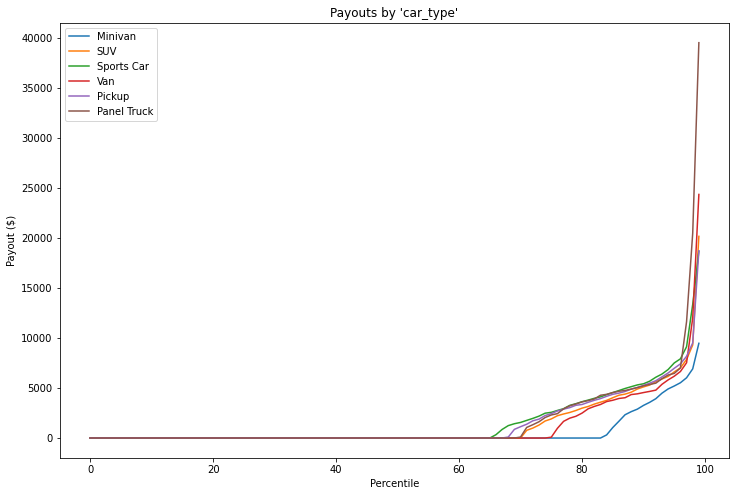

In [36]:
print('Mean payouts by car type:')
print('Minivan:      $', np.mean(target_amt[car_type == 'Minivan']))
print('SUV:          $', np.mean(target_amt[car_type == 'SUV']))
print('Sports Car:   $', np.mean(target_amt[car_type == 'Sports Car']))
print('Van:          $', np.mean(target_amt[car_type == 'Van']))
print('Pickup:       $', np.mean(target_amt[car_type == 'Pickup']))
print('Panel Truck:  $', np.mean(target_amt[car_type == 'Panel Truck']))

minivan_pct = [np.percentile(target_amt[car_type == 'Minivan'], i) for i in percentiles]
SUV_pct = [np.percentile(target_amt[car_type == 'SUV'], i) for i in percentiles]
sports_car_pct = [np.percentile(target_amt[car_type == 'Sports Car'], i) for i in percentiles]
van_pct = [np.percentile(target_amt[car_type == 'Van'], i) for i in percentiles]
pickup_pct = [np.percentile(target_amt[car_type == 'Pickup'], i) for i in percentiles]
panel_truck_pct = [np.percentile(target_amt[car_type == 'Panel Truck'], i) for i in percentiles]

fig = plt.figure(figsize=(12, 8))
plt.plot(percentiles, minivan_pct, label = 'Minivan');
plt.plot(percentiles, SUV_pct, label = 'SUV');
plt.plot(percentiles, sports_car_pct, label = 'Sports Car');
plt.plot(percentiles, van_pct, label = 'Van');
plt.plot(percentiles, pickup_pct, label = 'Pickup');
plt.plot(percentiles, panel_truck_pct, label = 'Panel Truck');
plt.title('Payouts by \'car_type\'');
plt.xlabel('Percentile');
plt.ylabel('Payout ($)');
plt.legend();

The main first-order finding here is that minivans — the blue line — have the lowest mean payout, by far. Nice driving!

In [37]:
print('Mean payouts by minivan status:')
print('Minivan:      $', np.mean(target_amt[car_type == 'Minivan']))
print('NOT Minivan:  $', np.mean(target_amt[car_type != 'Minivan']))

Mean payouts by minivan status:
Minivan:      $ 850.5629827373191
NOT Minivan:  $ 1726.002181463093


#### In the vein of 'eduquant' and 'jobquant', we can construct 'carquant':

* 'Minivan': 1
* 'z_SUV' / 'Van' / 'Pickup': 2
* 'Sports Car' / 'Panel Truck': 3

In [38]:
carquant_map = {'Minivan': 1, 'SUV': 2, 'Van': 2, 'Pickup': 2, 'Sports Car': 3, 'Panel Truck': 3}
df_train['CARQUANT'] = df_train['CAR_TYPE'].map(carquant_map);
df_train;

In [39]:
carquant = car_type.map(carquant_map);
carquant;

Moving onto the binary variables...

## Binary Variables

#### For each of the seven binary variables, we will look at both mean-payout disparity and plots of percentile-differentials in payouts.

Mean payouts by parent1 status:
Parent1 Yes: $ 2571.683614108126
Parent1 No:  $ 1307.7995747874738


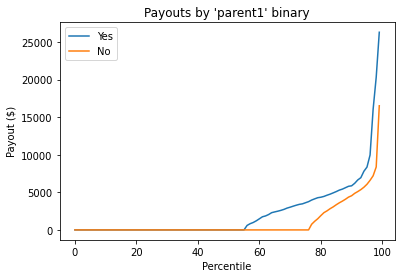

In [40]:
print('Mean payouts by parent1 status:')
print('Parent1 Yes: $', np.mean(target_amt[parent1 == 1]))
print('Parent1 No:  $', np.mean(target_amt[parent1 == 0]))

parent1_yes_pct = [np.percentile(target_amt[parent1 == 1], i) for i in percentiles]
parent1_no_pct = [np.percentile(target_amt[parent1 == 0], i) for i in percentiles]

plt.plot(percentiles, parent1_yes_pct, label = 'Yes');
plt.plot(percentiles, parent1_no_pct, label = 'No');
plt.title('Payouts by \'parent1\' binary');
plt.xlabel('Percentile');
plt.ylabel('Payout ($)');
plt.legend();

Single parents appear to have significantly more frequent accidents. The same is true of single people more generally, as we see below:

Mean payouts by marriage status:
Married:      $ 1129.55910745182
Not Married:  $ 1994.0919119312339


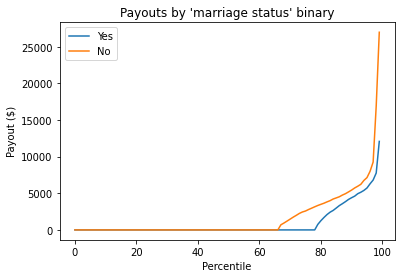

In [41]:
print('Mean payouts by marriage status:')
print('Married:      $', np.mean(target_amt[mstatus == 1]))
print('Not Married:  $', np.mean(target_amt[mstatus == 0]))

married_yes_pct = [np.percentile(target_amt[mstatus == 1], i) for i in percentiles]
married_no_pct = [np.percentile(target_amt[mstatus == 0], i) for i in percentiles]

plt.plot(percentiles, married_yes_pct, label = 'Yes');
plt.plot(percentiles, married_no_pct, label = 'No');
plt.title('Payouts by \'marriage status\' binary');
plt.xlabel('Percentile');
plt.ylabel('Payout ($)');
plt.legend();

Mean payouts by sex:
Sex-M: $ 1493.5484454048274
Sex-F: $ 1468.5590906682019


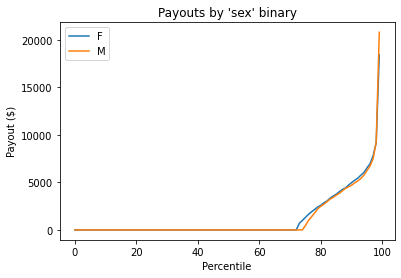

In [42]:
print('Mean payouts by sex:')
print('Sex-M: $', np.mean(target_amt[sex == 'M']))
print('Sex-F: $', np.mean(target_amt[sex == 'F']))

sex_F_pct = [np.percentile(target_amt[sex == 'F'], i) for i in percentiles]
sex_M_pct = [np.percentile(target_amt[sex == 'M'], i) for i in percentiles]

plt.plot(percentiles, sex_F_pct, label = 'F');
plt.plot(percentiles, sex_M_pct, label = 'M');
plt.title('Payouts by \'sex\' binary');
plt.xlabel('Percentile');
plt.ylabel('Payout ($)');
plt.legend();

Men appear to be in slightly more driving incidents than women, but the difference is small.

Mean payouts by car-use:
Private car-use:     $ 1141.0957705773906
Commercial car-use:  $ 2144.3492886026497


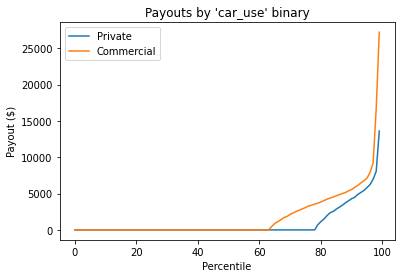

In [43]:
print('Mean payouts by car-use:')
print('Private car-use:     $', np.mean(target_amt[car_use == 'Private']))
print('Commercial car-use:  $', np.mean(target_amt[car_use == 'Commercial']))

private_pct = [np.percentile(target_amt[car_use == 'Private'], i) for i in percentiles]
commercial_pct = [np.percentile(target_amt[car_use == 'Commercial'], i) for i in percentiles]

plt.plot(percentiles, private_pct, label = 'Private');
plt.plot(percentiles, commercial_pct, label = 'Commercial');
plt.title('Payouts by \'car_use\' binary');
plt.xlabel('Percentile');
plt.ylabel('Payout ($)');
plt.legend();

Mean payouts by red-car status:
Red Car:      $ 1454.4610954054938
NOT Red Car:  $ 1489.4504817595696


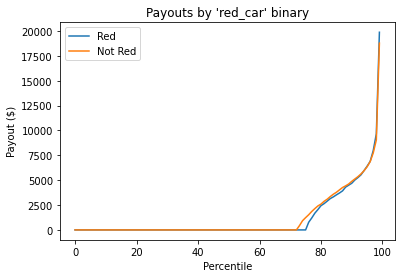

In [44]:
print('Mean payouts by red-car status:')
print('Red Car:      $', np.mean(target_amt[red_car == 1]))
print('NOT Red Car:  $', np.mean(target_amt[red_car == 0]))

red_pct = [np.percentile(target_amt[red_car == 1], i) for i in percentiles]
not_red_pct = [np.percentile(target_amt[red_car == 0], i) for i in percentiles]

plt.plot(percentiles, red_pct, label = 'Red');
plt.plot(percentiles, not_red_pct, label = 'Not Red');
plt.title('Payouts by \'red_car\' binary');
plt.xlabel('Percentile');
plt.ylabel('Payout ($)');
plt.legend();

Mean payouts by revocation status:
Revoked:      $ 2223.013456723579
NOT Revoked:  $ 1375.0128460456815


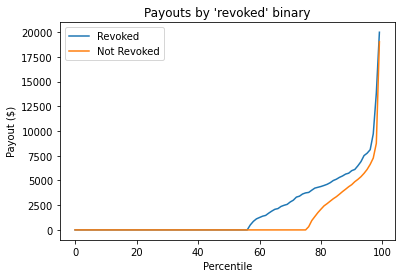

In [45]:
print('Mean payouts by revocation status:')
print('Revoked:      $', np.mean(target_amt[revoked == 1]))
print('NOT Revoked:  $', np.mean(target_amt[revoked == 0]))

revoked_pct = [np.percentile(target_amt[revoked == 1], i) for i in percentiles]
not_revoked_pct = [np.percentile(target_amt[revoked == 0], i) for i in percentiles]

plt.plot(percentiles, revoked_pct, label = 'Revoked');
plt.plot(percentiles, not_revoked_pct, label = 'Not Revoked');
plt.title('Payouts by \'revoked\' binary');
plt.xlabel('Percentile');
plt.ylabel('Payout ($)');
plt.legend();

Mean payouts by urbanicity:
Urban: $ 1774.7110331631604
Rural: $ 402.73635196358464


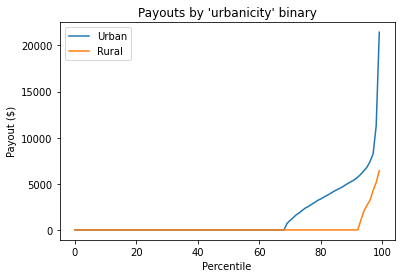

In [46]:
print('Mean payouts by urbanicity:')
print('Urban: $', np.mean(target_amt[urbanicity == 'Highly Urban/ Urban']))
print('Rural: $', np.mean(target_amt[urbanicity == 'Highly Rural/ Rural']))

urban_pct = [np.percentile(target_amt[urbanicity == 'Highly Urban/ Urban'], i) for i in percentiles]
rural_pct = [np.percentile(target_amt[urbanicity == 'Highly Rural/ Rural'], i) for i in percentiles]

plt.plot(percentiles, urban_pct, label = 'Urban');
plt.plot(percentiles, rural_pct, label = 'Rural');
plt.title('Payouts by \'urbanicity\' binary');
plt.xlabel('Percentile');
plt.ylabel('Payout ($)');
plt.legend();

Five of these binaries are interesting. The two that appear not to be are 'sex' and (surprisingly) 'red_car'.

It is logical that urban settings are prone to more car crashes, that commercial drivers are involved in a higher rate of incidents, and that drivers with history of license revocation are associated with riskier driving.

#### We will now convert the remaining binary variables to 1s and 0s to help with correlations. 

For 'sex', 'car use', and 'urbanicity', we have to arbitrarily assign qualities to values.

Commercial car use and urban setting were associated with higher payouts at all percentiles of their respective variables; thus, they will get the 1s. The mean payout for incidents involving men was slightly higher, so the logic will follow to assign the 1 to 'M'.

In [47]:
df_tr2 = df_tr2.replace({'F': 0, 'M': 1}).replace({'Private': 0, 'Commercial': 1}).replace({'Highly Rural/ Rural': 0, 'Highly Urban/ Urban': 1}).replace({'\$':''}, regex = True).replace({'\,':''}, regex = True)

# And for the variables, which are already in use...
sex = sex.replace({'F': 0, 'M': 1}).astype(float)
car_use = car_use.replace({'Private': 0, 'Commercial': 1}).astype(float)
urbanicity = urbanicity.replace({'Highly Rural/ Rural': 0, 'Highly Urban/ Urban': 1}).astype(float)

#### Below is our current dataset for the cleaned, 'NaN'-free training data:

In [48]:
df_tr2

,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
INDEX,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0.0,0,60.0,0,11.0,67349,0,0,0,1,PhD,Professional,14,0,14230,11,Minivan,1,4461,2,0,3,18.0,1
2,0,0.0,0,43.0,0,11.0,91449,0,257252,0,1,High School,Blue Collar,22,1,14940,1,Minivan,1,0,0,0,0,1.0,1
4,0,0.0,0,35.0,1,10.0,16039,0,124191,1,0,High School,Clerical,5,0,4010,4,SUV,0,38690,2,0,3,10.0,1
7,1,2946.0,0,34.0,1,12.0,125301,1,0,0,0,Bachelors,Blue Collar,46,1,17430,1,Sports Car,0,0,0,0,0,7.0,1
12,1,2501.0,0,34.0,0,10.0,62978,0,0,0,0,Bachelors,Clerical,34,0,11200,1,SUV,0,0,0,0,0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10296,0,0.0,0,41.0,0,7.0,6256,0,0,0,1,High School,Student,41,0,5600,1,Pickup,0,0,0,0,0,7.0,0
10297,0,0.0,0,35.0,0,11.0,43112,0,0,0,1,High School,Blue Collar,51,1,27330,10,Panel Truck,1,0,0,0,0,8.0,0
10298,0,0.0,1,45.0,2,9.0,164669,0,386273,1,1,PhD,Manager,21,0,13270,15,Minivan,0,0,0,0,2,17.0,1


In [49]:
print(df_tr2.dtypes)

TARGET_FLAG      int64
TARGET_AMT     float64
KIDSDRIV         int64
AGE            float64
HOMEKIDS         int64
YOJ            float64
INCOME          object
PARENT1          int64
HOME_VAL        object
MSTATUS          int64
SEX              int64
EDUCATION       object
JOB             object
TRAVTIME         int64
CAR_USE          int64
BLUEBOOK        object
TIF              int64
CAR_TYPE        object
RED_CAR          int64
OLDCLAIM        object
CLM_FREQ         int64
REVOKED          int64
MVR_PTS          int64
CAR_AGE        float64
URBANICITY       int64
dtype: object


At this point, we want everything to be numeric. We will fully replace the three qualitative variables ('EDUCATION', 'JOB', 'CAR_TYPE') with the relevant quantitative variables we have constructed.

Then, as we would still see four variables in object type, which we do not want ('INCOME', 'HOME_VAL', 'BLUEBOOK', 'OLDCLAIM'), we will convert the entire dataframe into the float type.

In [50]:
df_tr2['EDUCATION'] = eduquant
df_tr2['JOB'] = jobquant
df_tr2['CAR_TYPE'] = carquant

# And for the variables, which are already in use...

education = eduquant
job = jobquant
car_type = carquant

df_tr2 = df_tr2.astype(float)
df_tr_clean = df_tr2.copy() # (This will come in handy later.)
df_tr2

,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
INDEX,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,60.0,0.0,11.0,67349.0,0.0,0.0,0.0,1.0,5.0,2.0,14.0,0.0,14230.0,11.0,1.0,1.0,4461.0,2.0,0.0,3.0,18.0,1.0
2,0.0,0.0,0.0,43.0,0.0,11.0,91449.0,0.0,257252.0,0.0,1.0,2.0,1.0,22.0,1.0,14940.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.0,0.0,0.0,35.0,1.0,10.0,16039.0,0.0,124191.0,1.0,0.0,2.0,2.0,5.0,0.0,4010.0,4.0,2.0,0.0,38690.0,2.0,0.0,3.0,10.0,1.0
7,1.0,2946.0,0.0,34.0,1.0,12.0,125301.0,1.0,0.0,0.0,0.0,3.0,1.0,46.0,1.0,17430.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0
12,1.0,2501.0,0.0,34.0,0.0,10.0,62978.0,0.0,0.0,0.0,0.0,3.0,2.0,34.0,0.0,11200.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10296,0.0,0.0,0.0,41.0,0.0,7.0,6256.0,0.0,0.0,0.0,1.0,2.0,1.0,41.0,0.0,5600.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0
10297,0.0,0.0,0.0,35.0,0.0,11.0,43112.0,0.0,0.0,0.0,1.0,2.0,1.0,51.0,1.0,27330.0,10.0,3.0,1.0,0.0,0.0,0.0,0.0,8.0,0.0
10298,0.0,0.0,1.0,45.0,2.0,9.0,164669.0,0.0,386273.0,1.0,1.0,5.0,3.0,21.0,0.0,13270.0,15.0,1.0,0.0,0.0,0.0,0.0,2.0,17.0,1.0


In [51]:
df_tr_clean

,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
INDEX,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,60.0,0.0,11.0,67349.0,0.0,0.0,0.0,1.0,5.0,2.0,14.0,0.0,14230.0,11.0,1.0,1.0,4461.0,2.0,0.0,3.0,18.0,1.0
2,0.0,0.0,0.0,43.0,0.0,11.0,91449.0,0.0,257252.0,0.0,1.0,2.0,1.0,22.0,1.0,14940.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.0,0.0,0.0,35.0,1.0,10.0,16039.0,0.0,124191.0,1.0,0.0,2.0,2.0,5.0,0.0,4010.0,4.0,2.0,0.0,38690.0,2.0,0.0,3.0,10.0,1.0
7,1.0,2946.0,0.0,34.0,1.0,12.0,125301.0,1.0,0.0,0.0,0.0,3.0,1.0,46.0,1.0,17430.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0
12,1.0,2501.0,0.0,34.0,0.0,10.0,62978.0,0.0,0.0,0.0,0.0,3.0,2.0,34.0,0.0,11200.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10296,0.0,0.0,0.0,41.0,0.0,7.0,6256.0,0.0,0.0,0.0,1.0,2.0,1.0,41.0,0.0,5600.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0
10297,0.0,0.0,0.0,35.0,0.0,11.0,43112.0,0.0,0.0,0.0,1.0,2.0,1.0,51.0,1.0,27330.0,10.0,3.0,1.0,0.0,0.0,0.0,0.0,8.0,0.0
10298,0.0,0.0,1.0,45.0,2.0,9.0,164669.0,0.0,386273.0,1.0,1.0,5.0,3.0,21.0,0.0,13270.0,15.0,1.0,0.0,0.0,0.0,0.0,2.0,17.0,1.0


# 5. Analyze correlations between variables.

In [52]:
import statsmodels.api as sm;

In [53]:
df_corr = df_tr2.corr()
df_corr

,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
TARGET_FLAG,1.000000,0.541242,0.086933,-0.115274,0.111866,-0.066429,-0.148034,0.162017,-1.845159e-01,-0.131525,-0.024006,-0.143879,-0.172456,0.051459,0.160423,-0.111521,-0.078885,0.136773,-2.516496e-02,0.138721,0.228004,0.142795,0.230171,-0.110253,0.226721
TARGET_AMT,0.541242,1.000000,0.039043,-0.056546,0.053780,-0.024286,-0.062690,0.095154,-9.749983e-02,-0.093214,0.002727,-0.074394,-0.104987,0.024283,0.104196,-0.015724,-0.043934,0.088978,-3.449673e-03,0.074603,0.113483,0.061262,0.140949,-0.069613,0.123812
KIDSDRIV,0.086933,0.039043,1.000000,-0.066429,0.454167,0.051048,-0.031816,0.188811,-1.172042e-02,0.045769,-0.040837,-0.067726,-0.058282,-0.000443,0.009958,-0.011378,0.000524,0.000408,-3.352508e-02,0.022166,0.040624,0.037857,0.062978,-0.047095,-0.027217
AGE,-0.115274,-0.056546,-0.066429,1.000000,-0.445086,0.132253,0.183458,-0.316694,2.158415e-01,0.098247,0.062553,0.254676,0.168849,0.009195,-0.073692,0.156458,0.002110,0.008970,1.698497e-02,-0.026570,-0.030659,-0.035284,-0.078043,0.190253,0.043143
HOMEKIDS,0.111866,0.053780,0.454167,-0.445086,1.000000,0.095758,-0.145551,0.445659,-1.042645e-01,0.048468,-0.109589,-0.207375,-0.143887,-0.013962,0.027309,-0.092876,0.001333,0.034739,-6.934824e-02,0.033514,0.034326,0.044586,0.071230,-0.154874,-0.053517
YOJ,-0.066429,-0.024286,0.051048,0.132253,0.095758,1.000000,0.298453,-0.046951,2.772885e-01,0.141523,0.066328,0.074222,0.103360,-0.015694,0.006761,0.135757,0.030362,-0.058768,4.030718e-02,0.000764,-0.034353,-0.004496,-0.037392,0.053479,0.074142
INCOME,-0.148034,-0.062690,-0.031816,0.183458,-0.145551,0.298453,1.000000,-0.064973,5.817192e-01,-0.024963,0.057403,0.577780,0.355096,-0.045834,-0.016378,0.383451,0.008170,-0.062053,3.111072e-02,-0.040746,-0.061672,-0.016505,-0.077280,0.389749,0.201310
PARENT1,0.162017,0.095154,0.188811,-0.316694,0.445659,-0.046951,-0.064973,1.000000,-2.600270e-01,-0.480884,-0.069196,-0.078188,-0.057565,-0.011957,0.017964,-0.049007,-0.011548,0.012309,-4.402081e-02,0.034943,0.058332,0.046308,0.078017,-0.058432,-0.007313
HOME_VAL,-0.184516,-0.097500,-0.011720,0.215841,-0.104264,0.277288,0.581719,-0.260027,1.000000e+00,0.462668,0.038569,0.329558,0.230789,-0.029127,-0.024932,0.241906,-0.000740,-0.034976,-4.890107e-07,-0.060764,-0.103029,-0.045871,-0.099512,0.204695,0.106081
MSTATUS,-0.131525,-0.093214,0.045769,0.098247,0.048468,0.141523,-0.024963,-0.480884,4.626684e-01,1.000000,-0.006287,-0.036761,-0.016657,0.006651,-0.007751,0.014182,-0.003984,0.008492,-1.817449e-02,-0.043221,-0.076955,-0.037805,-0.059975,-0.029307,-0.006112


#### Visualizing the above matrix more nicely, with a heatmap...

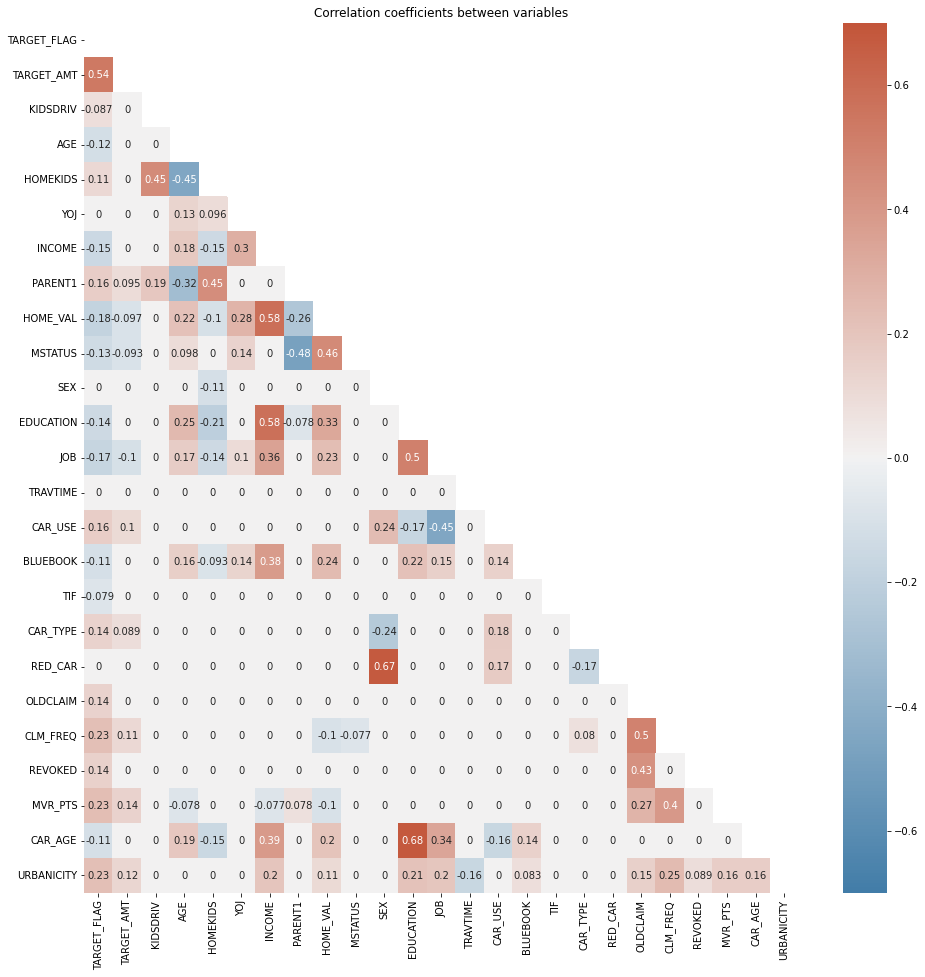

In [54]:
corr_trunc = df_corr
corr_trunc[np.abs(corr_trunc) < 0.075] = 0
# The above line helps with visibility, truncating out the weakest correlations.

f, ax = plt.subplots(figsize = (16, 16))
mask = np.triu(np.ones_like(corr_trunc, dtype = bool))
cmap = sns.diverging_palette(240, 20, as_cmap = True)
plt.title('Correlation coefficients between variables')

sns.heatmap(corr_trunc, annot = True, mask = mask, cmap = cmap, vmin = -0.7, vmax = 0.7);

We can see interesting correlations between the 23 input variables. For example, red cars correlate strongly with male drivers, and increases in car age correlate with increases in education level (many PhD holders might not have to drive at all, let alone as part of their job description, so their cars may experience little deterioration). 

The three inputs that most strongly correlate with 'target_flag' (in an apparent 3-way tie) are 'clm_freq', 'mvr_pts', and 'urbanicity'.

The same is true if we consider 'target_amt' — although the correlations are understandably weaker with this continuous variable, one which ranges by orders of magnitude, than they are for the simple binary variable of 'target_flag'. 

Furthermore, additional inputs, including 'car_use' and 'job', provide nearly the same amount of predictive power as these three for 'target_amt'.

In [55]:
df_tr2;

# 6. Experiment with a manual predictive approach.

This section is somewhat of an aside, more likely to provide intellectual satisfaction than predictive success — in the final sections, we will employ a sequential model from Keras, which will be superior. Nonetheless, this will help us form insights for the machine-learning portion.

Here, we will use the aforementioned 'clm_freq', 'mvr_pts', 'urbanicity', and 'car_use' to build a simple model for predicting 'target_flag'. 

The fifth variable that we would consider would be 'job', but it is the only one of the five to have 'NaN' values in the original training and test data. Fortunately, the 'education' variable correlates rather strongly with 'job', correlates nearly as strongly with 'target_flag' as does 'job', and contains no 'NaN' values. Thus, 'education' will be our fifth variable. It is very nice that five of the strongest input variables by predictive power are not missing any data!

The five selected variables for building our predictive algorithm:
1. 'clm_freq'
2. 'mvr_pts'
3. 'urbanicity'
4. 'car_use'
5. 'education'

It is important to acknowledge the correlations between the variables we have selected. The strongest, by far, is a 0.4 between 'clm_freq' and 'mvr_pts'. There exist correlations roughly half as large as this between 'urbanicity' and every variable except for 'car_use'. Lastly, there is a -0.17 correlation between 'car_use' and 'education'. This implies that 'urbanicity' is perhaps the least essential input for our model, yet there is ultimately a large enough degree of independence among all of the selected inputs that there is still a robust potential for interesting findings.

First, we will add three columns of (so far) zeros to the cleaned training dataframe:
* 'SCORE':      Does our new composite variable point toward an incident?
* 'PREDICTION': After determining a score threshold, what is the verdict on each customer?
* 'ON_TARGET':  Does the prediction align with the reality, found in 'TARGET_FLAG'?

Probability of incident by 'CLM_FREQ' value:
0:  0.177706836924714
1:  0.39385474860335196
2:  0.4110718492343934
3:  0.4182776801405975
4:  0.4326241134751773
5:  0.36363636363636365


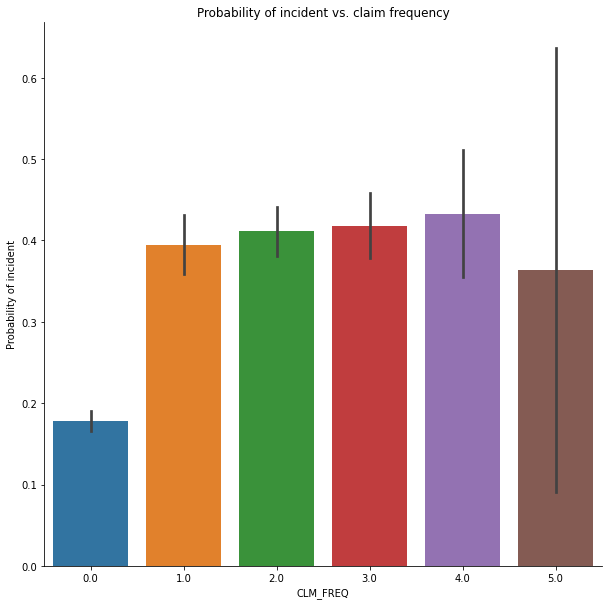

In [56]:
# Probability of incident by 'CLM_FREQ' value:

plt.figure(figsize = (10, 10))

# grouped barplot
ax = sns.barplot(x = clm_freq, y = target_flag)

# Customize the axes and title
ax.set_title("Probability of incident vs. claim frequency")
ax.set_ylabel("Probability of incident")

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

print('Probability of incident by \'CLM_FREQ\' value:')
print('0: ', np.sum(target_flag[clm_freq == 0]) / len(target_flag[clm_freq == 0]))
print('1: ', np.sum(target_flag[clm_freq == 1]) / len(target_flag[clm_freq == 1]))
print('2: ', np.sum(target_flag[clm_freq == 2]) / len(target_flag[clm_freq == 2]))
print('3: ', np.sum(target_flag[clm_freq == 3]) / len(target_flag[clm_freq == 3]))
print('4: ', np.sum(target_flag[clm_freq == 4]) / len(target_flag[clm_freq == 4]))
print('5: ', np.sum(target_flag[clm_freq == 5]) / len(target_flag[clm_freq == 5]))

Probability of incident by 'MVR_PTS' value:
0:  0.1905109489051095
1:  0.22847301951779564
2:  0.2828854314002829
3:  0.3248175182481752
4:  0.34831460674157305
5:  0.37966101694915255
6:  0.4175257731958763
7:  0.5419847328244275
8:  0.6981132075471698
9:  0.725
10: 0.7777777777777778
11: 0.9
13: 1.0


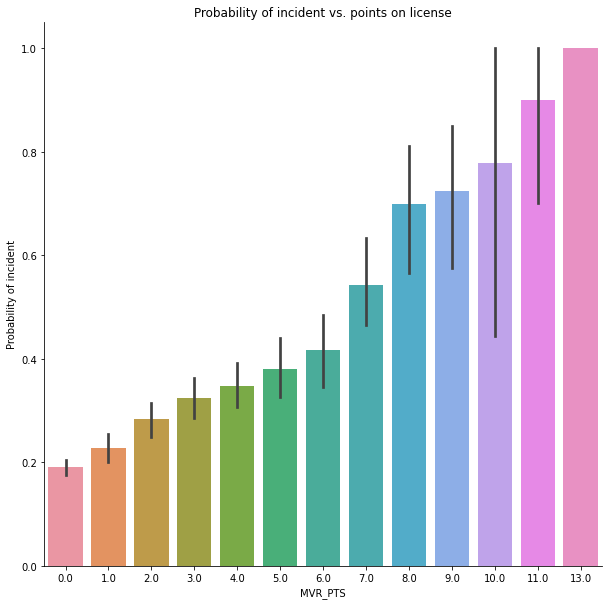

In [57]:
# Probability of incident by 'MVR_PTS' value:

plt.figure(figsize = (10, 10))

# grouped barplot
ax = sns.barplot(x = mvr_pts, y = target_flag)

# Customize the axes and title
ax.set_title("Probability of incident vs. points on license")
ax.set_ylabel("Probability of incident")

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

print('Probability of incident by \'MVR_PTS\' value:')
print('0: ', np.sum(target_flag[mvr_pts == 0]) / len(target_flag[mvr_pts == 0]))
print('1: ', np.sum(target_flag[mvr_pts == 1]) / len(target_flag[mvr_pts == 1]))
print('2: ', np.sum(target_flag[mvr_pts == 2]) / len(target_flag[mvr_pts == 2]))
print('3: ', np.sum(target_flag[mvr_pts == 3]) / len(target_flag[mvr_pts == 3]))
print('4: ', np.sum(target_flag[mvr_pts == 4]) / len(target_flag[mvr_pts == 4]))
print('5: ', np.sum(target_flag[mvr_pts == 5]) / len(target_flag[mvr_pts == 5]))
print('6: ', np.sum(target_flag[mvr_pts == 6]) / len(target_flag[mvr_pts == 6]))
print('7: ', np.sum(target_flag[mvr_pts == 7]) / len(target_flag[mvr_pts == 7]))
print('8: ', np.sum(target_flag[mvr_pts == 8]) / len(target_flag[mvr_pts == 8]))
print('9: ', np.sum(target_flag[mvr_pts == 9]) / len(target_flag[mvr_pts == 9]))
print('10:', np.sum(target_flag[mvr_pts == 10]) / len(target_flag[mvr_pts == 10]))
print('11:', np.sum(target_flag[mvr_pts == 11]) / len(target_flag[mvr_pts == 11]))
# print('12: ', np.sum(target_flag[mvr_pts == 12]) / len(target_flag[mvr_pts == 12]))
print('13:', np.sum(target_flag[mvr_pts == 13]) / len(target_flag[mvr_pts == 13]))

Probability of incident by 'URBANICITY' value:
0:  0.07384615384615385
1:  0.3173867228661749


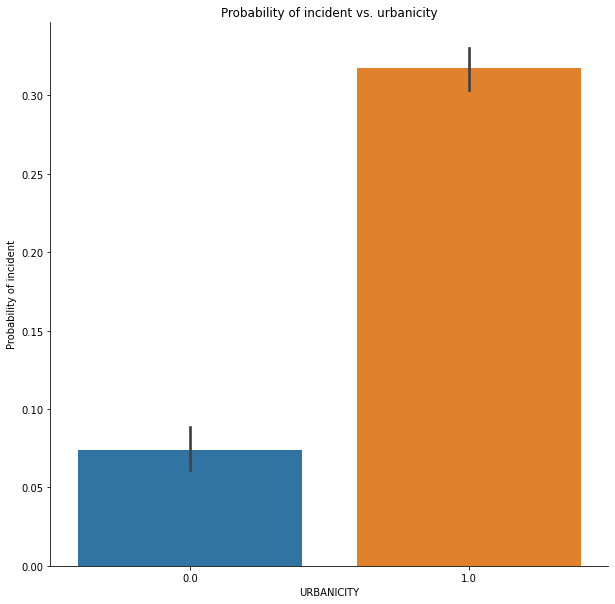

In [58]:
# Probability of incident by 'URBANICITY' value:

plt.figure(figsize = (10, 10))

# grouped barplot
ax = sns.barplot(x = urbanicity, y = target_flag)

# Customize the axes and title
ax.set_title("Probability of incident vs. urbanicity")
ax.set_ylabel("Probability of incident")

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

print('Probability of incident by \'URBANICITY\' value:')
print('0: ', np.sum(target_flag[urbanicity == 0]) / len(target_flag[urbanicity == 0]))
print('1: ', np.sum(target_flag[urbanicity == 1]) / len(target_flag[urbanicity == 1]))

Probability of incident by 'JOB' value:
1:  0.35469448584202684
2:  0.24959056665574844
3:  0.12870275791624106


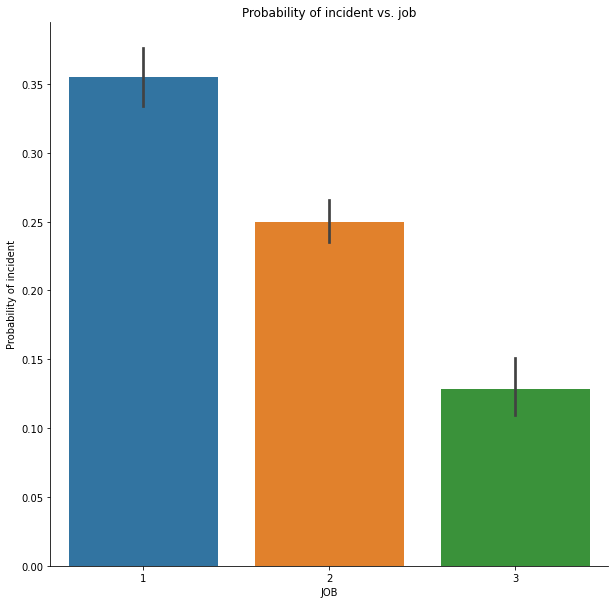

In [59]:
# Probability of incident by 'JOB' value:
# NOTE: We will not be using the 'JOB' variable in our predictions,
# due to the presence of 'NaN' values.

plt.figure(figsize = (10, 10))

# grouped barplot
ax = sns.barplot(x = job, y = target_flag)

# Customize the axes and title
ax.set_title("Probability of incident vs. job")
ax.set_ylabel("Probability of incident")

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

print('Probability of incident by \'JOB\' value:')
print('1: ', np.sum(target_flag[job == 1]) / len(target_flag[job == 1]))
print('2: ', np.sum(target_flag[job == 2]) / len(target_flag[job == 2]))
print('3: ', np.sum(target_flag[job == 3]) / len(target_flag[job == 3]))

Probability of incident by 'EDUCATION' value:
1:  0.32774869109947646
2:  0.3392094017094017
3:  0.23103448275862068
4:  0.1696512723845429
5:  0.17266187050359713


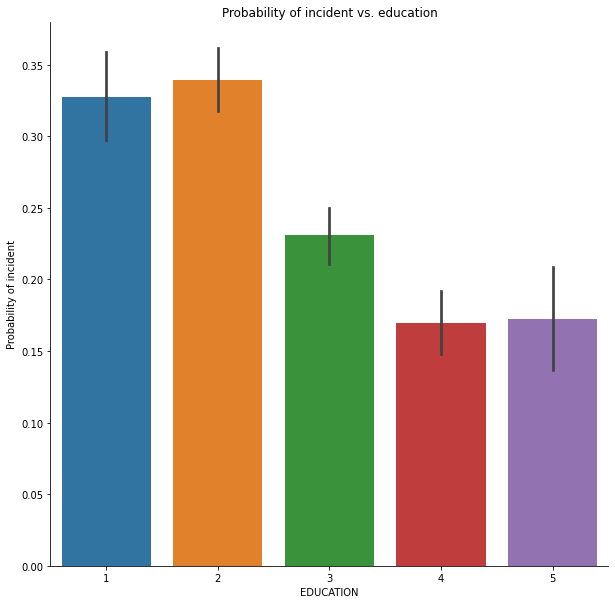

In [60]:
# Probability of incident by 'EDUCATION' value:

plt.figure(figsize = (10, 10))

# grouped barplot
ax = sns.barplot(x = education, y = target_flag)

# Customize the axes and title
ax.set_title("Probability of incident vs. education")
ax.set_ylabel("Probability of incident")

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

print('Probability of incident by \'EDUCATION\' value:')
print('1: ', np.sum(target_flag[education == 1]) / len(target_flag[education == 1]))
print('2: ', np.sum(target_flag[education == 2]) / len(target_flag[education == 2]))
print('3: ', np.sum(target_flag[education == 3]) / len(target_flag[education == 3]))
print('4: ', np.sum(target_flag[education == 4]) / len(target_flag[education == 4]))
print('5: ', np.sum(target_flag[education == 5]) / len(target_flag[education == 5]))

Probability of incident by 'CAR_USE' value:
0:  0.21448189762796505
1:  0.3642156862745098


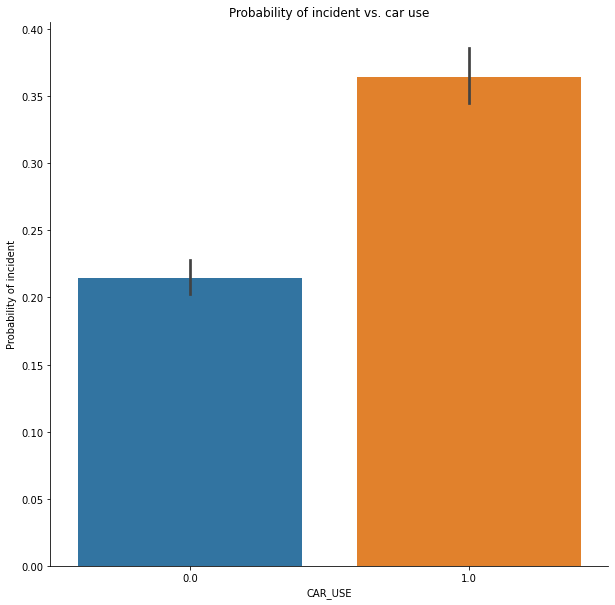

In [61]:
# Probability of incident by 'CAR_USE' value:

plt.figure(figsize=(10, 10))

# grouped barplot
ax = sns.barplot(x = car_use, y = target_flag)

# Customize the axes and title
ax.set_title("Probability of incident vs. car use")
ax.set_ylabel("Probability of incident")

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

print('Probability of incident by \'CAR_USE\' value:')
print('0: ', np.sum(target_flag[car_use == 0]) / len(target_flag[car_use == 0]))
print('1: ', np.sum(target_flag[car_use == 1]) / len(target_flag[car_use == 1]))

#### Translating these findings into scores, which we will weight by the strength of each input's correlation with 'TARGET_FLAG', we can create a 'PREDICTION' variable.

In [62]:
df_tr3 = df_tr2

df_tr3['SCORE']      = 0
df_tr3['PREDICTION'] = 0
df_tr3['ON_TARGET']  = 0

df_tr3['TARGET_FLAG'] = df_tr3['TARGET_FLAG'].astype(int)

clm_freq_score   = {0: 0.178,  1: 0.394, 2: 0.411, 3: 0.418, 4: 0.433, 5: 0.364}
mvr_pts_score    = {0: 0.191,  1: 0.228, 2: 0.283, 3: 0.348, 4: 0.433, 5: 0.380, 
                    6: 0.418, 7: 0.542, 8: 0.698, 9: 0.725, 10: 0.778, 11: 0.900, 
                    12: 0.950, 13: 1.00, 14: 1.00, 15: 1.00, 16: 1.00}
urbanicity_score = {0: 0.0738, 1: 0.317}
# job_score      = {1: 0.355,  2: 0.250, 3: 0.129}
education_score  = {1: 0.328,  2: 0.339, 3: 0.231, 4: 0.170, 5: 0.173}
car_use_score    = {1: 0.214,  2: 0.364}

df_tr3['CLM_FREQ']   = df_tr3['CLM_FREQ'].replace(clm_freq_score).astype(float)
df_tr3['MVR_PTS']    = df_tr3['MVR_PTS'].replace(mvr_pts_score).astype(float)
df_tr3['URBANICITY'] = df_tr3['URBANICITY'].replace(urbanicity_score).astype(float)
# df_tr3['JOB']      = df_tr3['JOB'].replace(job_score).astype(float)
df_tr3['EDUCATION']  = df_tr3['EDUCATION'].replace(education_score).astype(float)
df_tr3['CAR_USE']    = df_tr3['CAR_USE'].replace(car_use_score).astype(float)

df_tr3['SCORE'] =   (0
                   + 23 * df_tr3['CLM_FREQ']
                   + 23 * df_tr3['MVR_PTS']
                   + 23 * df_tr3['URBANICITY']
                   - 14 * df_tr3['EDUCATION']
                   + 16 * df_tr3['CAR_USE'])

# NOTE: There is a (-) sign on 'EDUCATION' due to negative correlation with 'TARGET_FLAG'.

for index, row in df_tr3.iterrows():
    if (row['SCORE'] >= 19.77):
        df_tr3.loc[index, 'PREDICTION'] = 1

for index, row in df_tr3.iterrows():
    if (row['PREDICTION'] == row['TARGET_FLAG']):
        df_tr3.loc[index, 'ON_TARGET'] = 1

print('Accuracy  =', np.round(np.sum(df_tr3['ON_TARGET']) / len(df_tr3), 4))
print('False (+) =', np.round(np.sum((df_tr3['PREDICTION'] == 1) & (df_tr3['TARGET_FLAG'] == 0)) / len(df_tr3), 4))
print('False (-) =', np.round(np.sum((df_tr3['PREDICTION'] == 0) & (df_tr3['TARGET_FLAG'] == 1)) / len(df_tr3), 4))
print()
print('Predicted (+) =', np.sum(df_tr3['PREDICTION']  == 1) ,)
print('Actual (+)    =', np.sum(df_tr3['TARGET_FLAG'] == 1) , )

manual_results = pd.DataFrame(df_tr3, columns = ['SCORE', 'TARGET_FLAG', 'PREDICTION', 'ON_TARGET'])
manual_results.head(30)

Accuracy  = 0.7074
False (+) = 0.1464
False (-) = 0.1462

Predicted (+) = 1603
Actual (+)    = 1602


,SCORE,TARGET_FLAG,PREDICTION,ON_TARGET
INDEX,,,,
1,22.3260,0,1,0
2,14.4560,0,0,1
4,20.0020,0,1,0
7,15.9680,1,0,0
12,12.5440,1,0,0
13,11.2254,0,0,1
14,13.3980,1,0,0
15,7.8044,0,0,1
16,24.9380,0,1,0


This has an interesting experiment so far. When we choose a 'SCORE' cutoff parameter such that we allocate the actual number of 1s, we see that the sensitivity (false positives) and specificity (false negatives) are equally frequent.

This manual approach did not result in a stellar performance, but we will see how it predicts the outcomes of the test data. First, we will make the relevant modifications to a copy of the test data, then we will fill out the 'TARGET_FLAG' column:

In [63]:
df_test2 = df_test2.replace({'F': 0, 'M': 1}).replace({'Private': 0, 'Commercial': 1}).replace({'Highly Rural/ Rural': 0, 'Highly Urban/ Urban': 1}).replace({'\$':''}, regex = True).replace({'\,':''}, regex = True)
df_test2['EDUCATION'] = df_test2['EDUCATION'].map(eduquant_map);
df_test2['JOB']       = df_test2['JOB'].map(jobquant_map);
df_test2['CAR_TYPE']  = df_test2['CAR_TYPE'].map(carquant_map);

df_test2 = df_test2.astype(float)
df_test_clean = df_test2.copy() # (This will come in handy later.)

In [64]:
df_test3 = df_test2

# df_test3['SCORE']      = 0
# df_test3['PREDICTION'] = 0
# df_test3['ON_TARGET']  = 0   # Not relevant here — nothing to compare!

df_test3['CLM_FREQ']   = df_test3['CLM_FREQ'].replace(clm_freq_score).astype(float)
df_test3['MVR_PTS']    = df_test3['MVR_PTS'].replace(mvr_pts_score).astype(float)
df_test3['URBANICITY'] = df_test3['URBANICITY'].replace(urbanicity_score).astype(float)
# df_test3['JOB']      = df_test3['JOB'].replace(job_score).astype(float)
df_test3['EDUCATION']  = df_test3['EDUCATION'].replace(education_score).astype(float)
df_test3['CAR_USE']    = df_test3['CAR_USE'].replace(car_use_score).astype(float)

df_test3

,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
INDEX,,,,,,,,,,,,,,,,,,,,,,,,,
3,NaN,NaN,0.0,48.0,0.0,11.0,52881.0,0.0,0.0,0.0,1.0,0.231,3.0,26.0,0.000,21970.0,1.0,2.0,1.0,0.0,0.178,0.0,0.283,10.0,0.3170
9,NaN,NaN,1.0,40.0,1.0,11.0,50815.0,1.0,0.0,0.0,1.0,0.339,3.0,21.0,0.000,18930.0,6.0,1.0,0.0,3295.0,0.394,0.0,0.283,1.0,0.3170
10,NaN,NaN,0.0,44.0,2.0,12.0,43486.0,1.0,0.0,0.0,0.0,0.339,1.0,30.0,0.214,5900.0,10.0,2.0,0.0,0.0,0.178,0.0,0.191,10.0,0.0738
18,NaN,NaN,0.0,35.0,2.0,NaN,21204.0,1.0,0.0,0.0,1.0,0.339,2.0,74.0,0.000,9230.0,6.0,2.0,0.0,0.0,0.178,1.0,0.191,4.0,0.0738
21,NaN,NaN,0.0,59.0,0.0,12.0,87460.0,0.0,0.0,0.0,1.0,0.339,3.0,45.0,0.000,15420.0,1.0,1.0,1.0,44857.0,0.411,0.0,0.433,1.0,0.3170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10279,NaN,NaN,0.0,46.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.339,1.0,32.0,0.214,1500.0,6.0,3.0,0.0,20519.0,0.394,1.0,0.348,8.0,0.0738
10281,NaN,NaN,0.0,46.0,0.0,12.0,43501.0,0.0,134977.0,1.0,1.0,0.339,2.0,60.0,0.000,16080.0,3.0,1.0,0.0,0.0,0.178,0.0,0.283,1.0,0.0738
10285,NaN,NaN,0.0,55.0,0.0,10.0,141083.0,0.0,393624.0,1.0,0.0,0.170,2.0,42.0,0.000,21110.0,10.0,3.0,0.0,0.0,0.178,0.0,0.191,22.0,0.0738


In [65]:
df_test3['SCORE'] =   (0
                   + 23 * df_test3['CLM_FREQ']
                   + 23 * df_test3['MVR_PTS']
                   + 23 * df_test3['URBANICITY']
                   - 14 * df_test3['EDUCATION']
                   + 16 * df_test3['CAR_USE'])

# NOTE: There is a (-) sign on 'EDUCATION' due to negative correlation with 'TARGET_FLAG'.

for index, row in df_test3.iterrows():
    if (row['SCORE'] >= 19.77):
        df_test3.loc[index, 'TARGET_FLAG'] = 1
    else:
        df_test3.loc[index, 'TARGET_FLAG'] = 0

df_test3

,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY,SCORE
INDEX,,,,,,,,,,,,,,,,,,,,,,,,,,
3,0.0,NaN,0.0,48.0,0.0,11.0,52881.0,0.0,0.0,0.0,1.0,0.231,3.0,26.0,0.000,21970.0,1.0,2.0,1.0,0.0,0.178,0.0,0.283,10.0,0.3170,14.6600
9,0.0,NaN,1.0,40.0,1.0,11.0,50815.0,1.0,0.0,0.0,1.0,0.339,3.0,21.0,0.000,18930.0,6.0,1.0,0.0,3295.0,0.394,0.0,0.283,1.0,0.3170,18.1160
10,0.0,NaN,0.0,44.0,2.0,12.0,43486.0,1.0,0.0,0.0,0.0,0.339,1.0,30.0,0.214,5900.0,10.0,2.0,0.0,0.0,0.178,0.0,0.191,10.0,0.0738,8.8624
18,0.0,NaN,0.0,35.0,2.0,NaN,21204.0,1.0,0.0,0.0,1.0,0.339,2.0,74.0,0.000,9230.0,6.0,2.0,0.0,0.0,0.178,1.0,0.191,4.0,0.0738,5.4384
21,1.0,NaN,0.0,59.0,0.0,12.0,87460.0,0.0,0.0,0.0,1.0,0.339,3.0,45.0,0.000,15420.0,1.0,1.0,1.0,44857.0,0.411,0.0,0.433,1.0,0.3170,21.9570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10279,0.0,NaN,0.0,46.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.339,1.0,32.0,0.214,1500.0,6.0,3.0,0.0,20519.0,0.394,1.0,0.348,8.0,0.0738,17.4414
10281,0.0,NaN,0.0,46.0,0.0,12.0,43501.0,0.0,134977.0,1.0,1.0,0.339,2.0,60.0,0.000,16080.0,3.0,1.0,0.0,0.0,0.178,0.0,0.283,1.0,0.0738,7.5544
10285,0.0,NaN,0.0,55.0,0.0,10.0,141083.0,0.0,393624.0,1.0,0.0,0.170,2.0,42.0,0.000,21110.0,10.0,3.0,0.0,0.0,0.178,0.0,0.191,22.0,0.0738,7.8044


In [66]:
print(np.sum(df_test3['TARGET_FLAG']))
print(np.round((np.sum(df_test3)['TARGET_FLAG'] / len(df_test3)), 4))

618.0
0.2887


# 7. Select key evaluative metric for binary classification.

Ultimately, predictive success is not our main goal. This claim may sound ironic, but it is humbling to consider that most of the permutations of this model we have built are less "successful" than simply assuming that no accidents (and therefore claims) will ever occur. That approach would be correct close to 75% of the time!

It would, however, be abysmal strategy for an auto insurer. They need to be able to anticipate at least as many accidents as will occur next year, so that they can properly budget for payouts, and collect slightly more money than that sum from their entire customer base. Financial solvency is the key metric of success for this project, not merely betting on the precise outcomes of coin flips.

Therefore, we will aim to minimize false negatives. We do not want the firm to have to spend thousands of dollars on accidents that it did not plan for but could have reasonably anticipated. It follows that false positives are somewhat more benign: The non-occurrences of expected accidents are objectively good things for all parties. Of course, in the long term the firm cannot compete well if the rates it passes onto its customers factor in twice as many accidents as will actually occur — but at more marginal levels this is a reasonable outcome to tolerate.

Revisiting the manual approach from the previous section, we can change the deterministic 'SCORE' from 19.77 to 17.77 to account for this new goal:

In [67]:
df_tr4 = df_tr2

df_tr4['SCORE']      = 0
df_tr4['PREDICTION'] = 0
df_tr4['ON_TARGET']  = 0

df_tr4['TARGET_FLAG'] = df_tr4['TARGET_FLAG'].astype(int)

clm_freq_score   = {0: 0.178,  1: 0.394, 2: 0.411, 3: 0.418, 4: 0.433, 5: 0.364}
mvr_pts_score    = {0: 0.191,  1: 0.228, 2: 0.283, 3: 0.348, 4: 0.433, 5: 0.380, 
                    6: 0.418, 7: 0.542, 8: 0.698, 9: 0.725, 10: 0.778, 11: 0.900, 
                    12: 0.950, 13: 1.00, 14: 1.00, 15: 1.00, 16: 1.00}
urbanicity_score = {0: 0.0738, 1: 0.317}
# job_score      = {1: 0.355,  2: 0.250, 3: 0.129}
education_score  = {1: 0.328,  2: 0.339, 3: 0.231, 4: 0.170, 5: 0.173}
car_use_score    = {1: 0.214,  2: 0.364}

df_tr4['CLM_FREQ']   = df_tr4['CLM_FREQ'].replace(clm_freq_score).astype(float)
df_tr4['MVR_PTS']    = df_tr4['MVR_PTS'].replace(mvr_pts_score).astype(float)
df_tr4['URBANICITY'] = df_tr4['URBANICITY'].replace(urbanicity_score).astype(float)
# df_tr4['JOB']      = df_tr4['JOB'].replace(job_score).astype(float)
df_tr4['EDUCATION']  = df_tr4['EDUCATION'].replace(education_score).astype(float)
df_tr4['CAR_USE']    = df_tr4['CAR_USE'].replace(car_use_score).astype(float)

df_tr4['SCORE'] =   (0
                   + 23 * df_tr4['CLM_FREQ']
                   + 23 * df_tr4['MVR_PTS']
                   + 23 * df_tr4['URBANICITY']
                   - 14 * df_tr4['EDUCATION']
                   + 16 * df_tr4['CAR_USE'])

# NOTE: There is a (-) sign on 'EDUCATION' due to negative correlation with 'TARGET_FLAG'.

for index, row in df_tr4.iterrows():
    if (row['SCORE'] >= 17.77):
        df_tr4.loc[index, 'PREDICTION'] = 1

for index, row in df_tr4.iterrows():
    if (row['PREDICTION'] == row['TARGET_FLAG']):
        df_tr4.loc[index, 'ON_TARGET'] = 1

print('Accuracy  =', np.round(np.sum(df_tr4['ON_TARGET']) / len(df_tr4), 4))
print('False (+) =', np.round(np.sum((df_tr4['PREDICTION'] == 1) & (df_tr4['TARGET_FLAG'] == 0)) / len(df_tr4), 4))
print('False (-) =', np.round(np.sum((df_tr4['PREDICTION'] == 0) & (df_tr4['TARGET_FLAG'] == 1)) / len(df_tr4), 4))
print()
print('Predicted (+) =', np.sum(df_tr4['PREDICTION']  == 1) ,)
print('Actual (+)    =', np.sum(df_tr4['TARGET_FLAG'] == 1) , )

manual_results = pd.DataFrame(df_tr4, columns = ['SCORE', 'TARGET_FLAG', 'PREDICTION', 'ON_TARGET'])
manual_results.head(30)

Accuracy  = 0.6779
False (+) = 0.2088
False (-) = 0.1133

Predicted (+) = 2179
Actual (+)    = 1602


,SCORE,TARGET_FLAG,PREDICTION,ON_TARGET
INDEX,,,,
1,22.3260,0,1,0
2,14.4560,0,0,1
4,20.0020,0,1,0
7,15.9680,1,0,0
12,12.5440,1,0,0
13,11.2254,0,0,1
14,13.3980,1,0,0
15,7.8044,0,0,1
16,24.9380,0,1,0


If you are using Google Colab (as I did), running the next two boxes will save the manual model's predictions for the test-data 'TARGET_FLAG' to your Drive as a CSV:

In [68]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [69]:
test_predictions_manual = df_test3

test_predictions_manual.to_csv('test_predictions_manual.csv')
!cp test_predictions_manual.csv "drive/My Drive/"

This change appears to have been successful: We took a ~3% accuracy hit but reduced the false-negative rate by more than 3%. Of course, this means that the false-positive rate saw an overcompensatory increase, but that is in line with the tradeoff space we have accepted.

We are done with the manual portion; we will conclude this project with machine learning.

Our binary-classification data is unbalanced, with true negatives dominating true positives in a roughly 3:1 ratio. Thus, the rare case of a true positive masquerading with the negatives is particularly detrimental, and the best metric for focusing on false negatives is the F2 score.

Two important foundational concepts are precision and recall. The former is the ratio of true-positive readings to _all_ positive readings (i.e., TP + FP). The latter is the ratio of true-positive readings to all positive _events_ (i.e., TP + FN). Clearly, recall is of more pertinence to the strategy of this project.

F2 is a weighted version of a more common metric, the F1 score, which is the harmonic mean of precision and recall, and an excellent metric for balanced data. It is still likely the most relevant of the common metrics for our use-case, yet F2 is even better, applying four (2^2) times more weight to recall than to precision.

#### _Our ultimate goal is to predict 'TARGET_FLAG' for our test data with the most promising ML model in terms of F2 score._

# 8. Generate final results with a machine-learning model.

A good first step for choosing our ML model is to consider the 29 classification models in a relatively new Python package, lazypredict. This package evaluates each model's success on training/test data across a handful of metrics, including the F1 score. We can consider the best model by F1 score from lazypredict, then aim to modift the model with the goal of using F2 weights. 



In [70]:
# This may be helpful:

!pip install lazypredict

# NOTE: lazypredict works on Google Colab, but it may not on Jupyter Notebook.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [71]:
import lazypredict

from lazypredict.Supervised import LazyRegressor # We will not use this today.

from lazypredict.Supervised import LazyClassifier

from sklearn.model_selection import train_test_split

#### IMPORTANT NOTE: Our "test" data is not what we will be using in this part. We will save it for the very final prediction, once our model has been selected and trained.

#### For the remainder of this section, the test data we use will be a random subset of the training data with known outcomes.

In [72]:
df_tr_clean

,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
INDEX,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.00,0.00,0.00,60.00,0.00,11.00,67349.00,0.00,0.00,0.00,1.00,5.00,2.00,14.00,0.00,14230.00,11.00,1.00,1.00,4461.00,2.00,0.00,3.00,18.00,1.00
2,0.00,0.00,0.00,43.00,0.00,11.00,91449.00,0.00,257252.00,0.00,1.00,2.00,1.00,22.00,1.00,14940.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00
4,0.00,0.00,0.00,35.00,1.00,10.00,16039.00,0.00,124191.00,1.00,0.00,2.00,2.00,5.00,0.00,4010.00,4.00,2.00,0.00,38690.00,2.00,0.00,3.00,10.00,1.00
7,1.00,2946.00,0.00,34.00,1.00,12.00,125301.00,1.00,0.00,0.00,0.00,3.00,1.00,46.00,1.00,17430.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,7.00,1.00
12,1.00,2501.00,0.00,34.00,0.00,10.00,62978.00,0.00,0.00,0.00,0.00,3.00,2.00,34.00,0.00,11200.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10296,0.00,0.00,0.00,41.00,0.00,7.00,6256.00,0.00,0.00,0.00,1.00,2.00,1.00,41.00,0.00,5600.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,7.00,0.00
10297,0.00,0.00,0.00,35.00,0.00,11.00,43112.00,0.00,0.00,0.00,1.00,2.00,1.00,51.00,1.00,27330.00,10.00,3.00,1.00,0.00,0.00,0.00,0.00,8.00,0.00
10298,0.00,0.00,1.00,45.00,2.00,9.00,164669.00,0.00,386273.00,1.00,1.00,5.00,3.00,21.00,0.00,13270.00,15.00,1.00,0.00,0.00,0.00,0.00,2.00,17.00,1.00


In [73]:
df_test_clean;

In [74]:
df_tr_clean['TARGET_FLAG']

INDEX
1       0.00
2       0.00
4       0.00
7       1.00
12      1.00
        ... 
10296   0.00
10297   0.00
10298   0.00
10301   0.00
10302   0.00
Name: TARGET_FLAG, Length: 6045, dtype: float64

In [75]:
df_test_clean.isna().sum()

TARGET_FLAG    2141
TARGET_AMT     2141
KIDSDRIV          0
AGE               1
HOMEKIDS          0
YOJ              94
INCOME          125
PARENT1           0
HOME_VAL        111
MSTATUS           0
SEX               0
EDUCATION         0
JOB             139
TRAVTIME          0
CAR_USE           0
BLUEBOOK          0
TIF               0
CAR_TYPE          0
RED_CAR           0
OLDCLAIM          0
CLM_FREQ          0
REVOKED           0
MVR_PTS           0
CAR_AGE         129
URBANICITY        0
dtype: int64

#### We will exclude the following columns from the remainder of our analysis:
* AGE
* YOJ
* INCOME
* HOME_VAL
* JOB
* CAR_AGE

In [76]:
X = df_tr_clean[['KIDSDRIV', 'HOMEKIDS', 'PARENT1', 'MSTATUS',	'SEX',	'EDUCATION',	'TRAVTIME',	'CAR_USE',	'BLUEBOOK',	'TIF',	'CAR_TYPE',	'RED_CAR',	'OLDCLAIM',	'CLM_FREQ',	'REVOKED', 'MVR_PTS',	'URBANICITY']]
y = df_tr_clean['TARGET_FLAG']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [77]:
y_test

INDEX
3842    0.00
10104   0.00
9490    1.00
2428    0.00
9775    0.00
        ... 
597     0.00
9992    0.00
1412    0.00
6606    0.00
4910    0.00
Name: TARGET_FLAG, Length: 1814, dtype: float64

In [78]:
multiple_ML_model = LazyClassifier(verbose = 0, ignore_warnings = True, predictions = True)

models, predictions = multiple_ML_model.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:19<00:00,  1.48it/s]


In [79]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.73,0.72,0.72,0.74,0.06
QuadraticDiscriminantAnalysis,0.75,0.70,0.70,0.75,0.06
BernoulliNB,0.75,0.67,0.67,0.75,0.05
GaussianNB,0.73,0.67,0.67,0.74,0.06
LinearDiscriminantAnalysis,0.78,0.67,0.67,0.76,0.08
AdaBoostClassifier,0.77,0.67,0.67,0.76,0.31
XGBClassifier,0.78,0.66,0.66,0.76,0.59
CalibratedClassifierCV,0.78,0.66,0.66,0.76,2.20
LogisticRegression,0.78,0.66,0.66,0.76,0.10


We appear to have many candidates for consideration, all with an F1 scores around 0.75.

We will dive (shallowly) into six that are part of sklearn: 
1. GaussianNB
2. QuadraticDiscriminantAnalysis
3. LogisticRegression
4. CalibratedClassifierCV
5. LinearDiscriminantAnalysis
6. LinearSVC

But first, we will lay out the syntax of the F2-evaluation infrastructure:

In [80]:
from sklearn.metrics import fbeta_score

# We will utilize this syntax for each MODEL:
# f2_MODEL = fbeta_score(y_test, y_pred_MODEL, beta = 2)

#### GaussianNB ("Naive Bayes")

In [81]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()

# We can use the same data as before:
# X_train, X_test, y_train, y_test

GNB.fit(X_train, y_train)

y_pred_GNB = GNB.predict(X_test)
print('y_test predictions for GaussianNB:', y_pred_GNB)

f2_GNB = fbeta_score(y_test, y_pred_GNB, beta = 2)
print('F2 score for GaussianNB:', f2_GNB)

y_test predictions for GaussianNB: [1. 0. 0. ... 0. 0. 0.]
F2 score for GaussianNB: 0.4651647893199834


This is not an ideal F2 score.

#### QuadraticDiscriminantAnalysis

In [82]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

QDA = QuadraticDiscriminantAnalysis()

QDA.fit(X_train, y_train)

y_pred_QDA = QDA.predict(X_test)
print('y_test predictions for QuadraticDiscriminantAnalysis:', y_pred_QDA)

f2_QDA = fbeta_score(y_test, y_pred_QDA, beta = 2)
print('F2 score for QuadraticDiscriminantAnalysis:', f2_QDA)

y_test predictions for QuadraticDiscriminantAnalysis: [1. 0. 0. ... 0. 0. 0.]
F2 score for QuadraticDiscriminantAnalysis: 0.5697211155378485


#### LogisticRegression

In [83]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()

LR.fit(X_train, y_train)

y_pred_LR = LR.predict(X_test)
print('y_test predictions for LogisticRegression:', y_pred_LR)

f2_LR = fbeta_score(y_test, y_pred_LR, beta = 2)
print('F2 score for LogisticRegression:', f2_LR)

y_test predictions for LogisticRegression: [1. 0. 0. ... 0. 0. 0.]
F2 score for LogisticRegression: 0.3472840605520926


#### CalibratedClassifierCV

In [84]:
from sklearn.calibration import CalibratedClassifierCV

CCCV = CalibratedClassifierCV()

CCCV.fit(X_train, y_train)

y_pred_CCCV = CCCV.predict(X_test)
print('y_test predictions for CalibratedClassifierCV:', y_pred_CCCV)

f2_CCCV = fbeta_score(y_test, y_pred_CCCV, beta = 2)
print('F2 score for CalibratedClassifierCV:', f2_CCCV)

y_test predictions for CalibratedClassifierCV: [0. 0. 0. ... 0. 0. 0.]
F2 score for CalibratedClassifierCV: 0.0


#### LinearDiscriminantAnalysis

In [85]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis()

LDA.fit(X_train, y_train)

y_pred_LDA = LDA.predict(X_test)
print('y_test predictions for LinearDiscriminantAnalysis:', y_pred_LDA)

f2_LDA = fbeta_score(y_test, y_pred_LDA, beta = 2)
print('F2 score for LinearDiscriminantAnalysis:', f2_LDA)

y_test predictions for LinearDiscriminantAnalysis: [0. 0. 0. ... 0. 0. 0.]
F2 score for LinearDiscriminantAnalysis: 0.45395308427454384


#### LinearSVC

In [86]:
from sklearn.svm import LinearSVC

LSVC = LinearSVC()

LSVC.fit(X_train, y_train)

y_pred_LSVC = LSVC.predict(X_test)
print('y_test predictions for LinearSVC:', y_pred_LSVC)

f2_LSVC = fbeta_score(y_test, y_pred_LSVC, beta = 2)
print('F2 score for LinearSVC:', f2_LSVC)

y_test predictions for LinearSVC: [1. 0. 0. ... 0. 0. 0.]
F2 score for LinearSVC: 0.20670647680293983


None of these F2 scores are inspiring, signifying that for greater F2 performance, we would have to do a significantly deeper investigation into various models. 

Nonetheless, given the models that we do currrently have, QuadraticDiscriminantAnalysis is our clear winner on the F2 metric. We will use QDA to make our final test-data predictions!

In [87]:
y_pred_ML = QDA.predict(df_test_clean[['KIDSDRIV', 'HOMEKIDS', 'PARENT1', 'MSTATUS',	'SEX',	'EDUCATION',	'TRAVTIME',	'CAR_USE',	'BLUEBOOK',	'TIF',	'CAR_TYPE',	'RED_CAR',	'OLDCLAIM',	'CLM_FREQ',	'REVOKED', 'MVR_PTS',	'URBANICITY']])

In [88]:
df_test_clean['TARGET_FLAG'] = y_pred_ML

In [89]:
test_predictions_ML = df_test_clean
test_predictions_ML

,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
INDEX,,,,,,,,,,,,,,,,,,,,,,,,,
3,0.00,NaN,0.00,48.00,0.00,11.00,52881.00,0.00,0.00,0.00,1.00,3.00,3.00,26.00,0.00,21970.00,1.00,2.00,1.00,0.00,0.00,0.00,2.00,10.00,1.00
9,1.00,NaN,1.00,40.00,1.00,11.00,50815.00,1.00,0.00,0.00,1.00,2.00,3.00,21.00,0.00,18930.00,6.00,1.00,0.00,3295.00,1.00,0.00,2.00,1.00,1.00
10,0.00,NaN,0.00,44.00,2.00,12.00,43486.00,1.00,0.00,0.00,0.00,2.00,1.00,30.00,1.00,5900.00,10.00,2.00,0.00,0.00,0.00,0.00,0.00,10.00,0.00
18,0.00,NaN,0.00,35.00,2.00,NaN,21204.00,1.00,0.00,0.00,1.00,2.00,2.00,74.00,0.00,9230.00,6.00,2.00,0.00,0.00,0.00,1.00,0.00,4.00,0.00
21,0.00,NaN,0.00,59.00,0.00,12.00,87460.00,0.00,0.00,0.00,1.00,2.00,3.00,45.00,0.00,15420.00,1.00,1.00,1.00,44857.00,2.00,0.00,4.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10279,0.00,NaN,0.00,46.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,2.00,1.00,32.00,1.00,1500.00,6.00,3.00,0.00,20519.00,1.00,1.00,3.00,8.00,0.00
10281,0.00,NaN,0.00,46.00,0.00,12.00,43501.00,0.00,134977.00,1.00,1.00,2.00,2.00,60.00,0.00,16080.00,3.00,1.00,0.00,0.00,0.00,0.00,2.00,1.00,0.00
10285,0.00,NaN,0.00,55.00,0.00,10.00,141083.00,0.00,393624.00,1.00,0.00,4.00,2.00,42.00,0.00,21110.00,10.00,3.00,0.00,0.00,0.00,0.00,0.00,22.00,0.00


In [90]:
test_predictions_ML.to_csv('test_predictions_ML.csv')
!cp test_predictions_ML.csv "drive/My Drive/"

#### The two output CSVs (for manual and ML predictions) can be found on my GitHub repository for this project: 

#### https://github.com/willflan/auto_insurance_predictions

#### Thanks for reading!